<a href="https://colab.research.google.com/github/areezmuhammed/Hackathon/blob/main/code/ARIMA_PR_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Emission prediction model

By Katy Kittivibul

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

## Import data

In [ ]:
# This code for uploading file but if you drop the file in the "file" section, you can skip this.

#from google.colab import files
#uploaded = files.upload()


In [ ]:
df = pd.read_csv('2005-2022-local-authority-ghg-emissions-csv-dataset.csv')
df.head(5)

Country Country Code      Region Region Code Second Tier Authority  \
0  England    E92000001  North East   E12000001            Hartlepool   
1  England    E92000001  North East   E12000001            Hartlepool   
2  England    E92000001  North East   E12000001            Hartlepool   
3  England    E92000001  North East   E12000001            Hartlepool   
4  England    E92000001  North East   E12000001            Hartlepool   

  Local Authority Local Authority Code  Calendar Year LA GHG Sector  \
0      Hartlepool            E06000001           2005   Agriculture   
1      Hartlepool            E06000001           2005   Agriculture   
2      Hartlepool            E06000001           2005   Agriculture   
3      Hartlepool            E06000001           2005   Agriculture   
4      Hartlepool            E06000001           2005   Agriculture   

         LA GHG Sub-sector Greenhouse gas  Territorial emissions (kt CO2e)  \
0  Agriculture Electricity            CO2                         1.678178   
1  Agriculture Electricity            CH4                         0.052700   
2  Agriculture Electricity            N2O                         0.006770   
3          Agriculture Gas            CO2                         0.311375   
4          Agriculture Gas            CH4                         0.010500   

   CO2 emissions within the scope of influence of LAs (kt CO2)  \
0                                           1.678178             
1                                           0.000000             
2                                           0.000000             
3                                           0.311375             
4                                           0.000000             

   Mid-year Population (thousands)  Area (km2)  
0                           90.457     98.3466  
1                           90.457     98.3466  
2                           90.457     98.3466  
3                           90.457     98.3466  
4                           90.457     98.3466

In [ ]:
df.shape

(533016, 15)

## Data cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533016 entries, 0 to 533015
Data columns (total 15 columns):
 #   Column                                                       Non-Null Count   Dtype  
---  ------                                                       --------------   -----  
 0   Country                                                      533016 non-null  object 
 1   Country Code                                                 532602 non-null  object 
 2   Region                                                       533016 non-null  object 
 3   Region Code                                                  532602 non-null  object 
 4   Second Tier Authority                                        532602 non-null  object 
 5   Local Authority                                              533016 non-null  object 
 6   Local Authority Code                                         533016 non-null  object 
 7   Calendar Year                                                5330

In [ ]:
df.isnull().sum()

Country                                                          0
Country Code                                                   414
Region                                                           0
Region Code                                                    414
Second Tier Authority                                          414
Local Authority                                                  0
Local Authority Code                                             0
Calendar Year                                                    0
LA GHG Sector                                                    0
LA GHG Sub-sector                                                0
Greenhouse gas                                                   0
Territorial emissions (kt CO2e)                                  0
CO2 emissions within the scope of influence of LAs (kt CO2)      0
Mid-year Population (thousands)                                414
Area (km2)                                                     414
dtype: int64

In [ ]:
df_sel = df[["Region", "Calendar Year", "Local Authority" , "LA GHG Sector", "LA GHG Sub-sector", "Greenhouse gas",
             "Territorial emissions (kt CO2e)", "CO2 emissions within the scope of influence of LAs (kt CO2)", "Mid-year Population (thousands)"]]
df_sel.head(5)

Region  Calendar Year Local Authority LA GHG Sector  \
0  North East           2005      Hartlepool   Agriculture   
1  North East           2005      Hartlepool   Agriculture   
2  North East           2005      Hartlepool   Agriculture   
3  North East           2005      Hartlepool   Agriculture   
4  North East           2005      Hartlepool   Agriculture   

         LA GHG Sub-sector Greenhouse gas  Territorial emissions (kt CO2e)  \
0  Agriculture Electricity            CO2                         1.678178   
1  Agriculture Electricity            CH4                         0.052700   
2  Agriculture Electricity            N2O                         0.006770   
3          Agriculture Gas            CO2                         0.311375   
4          Agriculture Gas            CH4                         0.010500   

   CO2 emissions within the scope of influence of LAs (kt CO2)  \
0                                           1.678178             
1                                           0.000000             
2                                           0.000000             
3                                           0.311375             
4                                           0.000000             

   Mid-year Population (thousands)  
0                           90.457  
1                           90.457  
2                           90.457  
3                           90.457  
4                           90.457

In [ ]:
df_sel.shape

(533016, 9)

In [ ]:
df_sel.isnull().sum()

Region                                                           0
Calendar Year                                                    0
Local Authority                                                  0
LA GHG Sector                                                    0
LA GHG Sub-sector                                                0
Greenhouse gas                                                   0
Territorial emissions (kt CO2e)                                  0
CO2 emissions within the scope of influence of LAs (kt CO2)      0
Mid-year Population (thousands)                                414
dtype: int64

In [ ]:
df_sel["Region"].value_counts()

Region
South East                  93988
East of England             65897
North West                  53434
East Midlands               51598
London                      46863
Scotland                    46538
West Midlands               45014
South West                  39592
Wales                       32631
Yorkshire and the Humber    22865
North East                  17814
Northern Ireland            16368
Unallocated                   414
Name: count, dtype: int64

In [ ]:
df_yorkshire = df_sel[df_sel["Region"] == "Yorkshire and the Humber"]
df_yorkshire.head()

Region  Calendar Year              Local Authority  \
13482  Yorkshire and the Humber           2005  Kingston upon Hull, City of   
13483  Yorkshire and the Humber           2005  Kingston upon Hull, City of   
13484  Yorkshire and the Humber           2005  Kingston upon Hull, City of   
13485  Yorkshire and the Humber           2005  Kingston upon Hull, City of   
13486  Yorkshire and the Humber           2005  Kingston upon Hull, City of   

      LA GHG Sector        LA GHG Sub-sector Greenhouse gas  \
13482   Agriculture  Agriculture Electricity            CO2   
13483   Agriculture  Agriculture Electricity            CH4   
13484   Agriculture  Agriculture Electricity            N2O   
13485   Agriculture          Agriculture Gas            CO2   
13486   Agriculture          Agriculture Gas            CH4   

       Territorial emissions (kt CO2e)  \
13482                         0.272135   
13483                         0.008540   
13484                         0.001100   
13485                         0.245342   
13486                         0.008250   

       CO2 emissions within the scope of influence of LAs (kt CO2)  \
13482                                           0.272135             
13483                                           0.000000             
13484                                           0.000000             
13485                                           0.245342             
13486                                           0.000000             

       Mid-year Population (thousands)  
13482                          255.159  
13483                          255.159  
13484                          255.159  
13485                          255.159  
13486                          255.159

In [ ]:
df_yorkshire.isnull().sum()

Region                                                         0
Calendar Year                                                  0
Local Authority                                                0
LA GHG Sector                                                  0
LA GHG Sub-sector                                              0
Greenhouse gas                                                 0
Territorial emissions (kt CO2e)                                0
CO2 emissions within the scope of influence of LAs (kt CO2)    0
Mid-year Population (thousands)                                0
dtype: int64

In [ ]:
df_yorkshire["Local Authority"].value_counts()

Local Authority
Calderdale                     1547
Kirklees                       1545
North Yorkshire                1543
Doncaster                      1543
Barnsley                       1541
Wakefield                      1539
East Riding of Yorkshire       1537
Sheffield                      1537
North Lincolnshire             1537
Bradford                       1535
Rotherham                      1535
Leeds                          1535
North East Lincolnshire        1483
York                           1481
Kingston upon Hull, City of    1427
Name: count, dtype: int64

In [ ]:
df_yorkshire["Local Authority"] = df_yorkshire["Local Authority"].replace("Kingston upon Hull, City of", "Kingston")

<ipython-input-14-147ab8d6573a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yorkshire["Local Authority"] = df_yorkshire["Local Authority"].replace("Kingston upon Hull, City of", "Kingston")


In [ ]:
df_yorkshire["Local Authority"].value_counts()

Local Authority
Calderdale                  1547
Kirklees                    1545
North Yorkshire             1543
Doncaster                   1543
Barnsley                    1541
Wakefield                   1539
East Riding of Yorkshire    1537
Sheffield                   1537
North Lincolnshire          1537
Bradford                    1535
Rotherham                   1535
Leeds                       1535
North East Lincolnshire     1483
York                        1481
Kingston                    1427
Name: count, dtype: int64

In [ ]:
print(df_yorkshire['Calendar Year'].head())

13482    2005
13483    2005
13484    2005
13485    2005
13486    2005
Name: Calendar Year, dtype: int64


In [ ]:
# Save the DataFrame to a CSV file named 'yorkshire.csv'
df_yorkshire.to_csv('yorkshire.csv')

## EDA

In [ ]:
df_yorkshire.columns

Index(['Region', 'Calendar Year', 'Local Authority', 'LA GHG Sector',
       'LA GHG Sub-sector', 'Greenhouse gas',
       'Territorial emissions (kt CO2e)',
       'CO2 emissions within the scope of influence of LAs (kt CO2)',
       'Mid-year Population (thousands)'],
      dtype='object')

array([[<Axes: title={'center': 'Territorial emissions (kt CO2e)'}>,
        <Axes: title={'center': 'CO2 emissions within the scope of influence of LAs (kt CO2)'}>,
        <Axes: title={'center': 'Mid-year Population (thousands)'}>]],
      dtype=object)

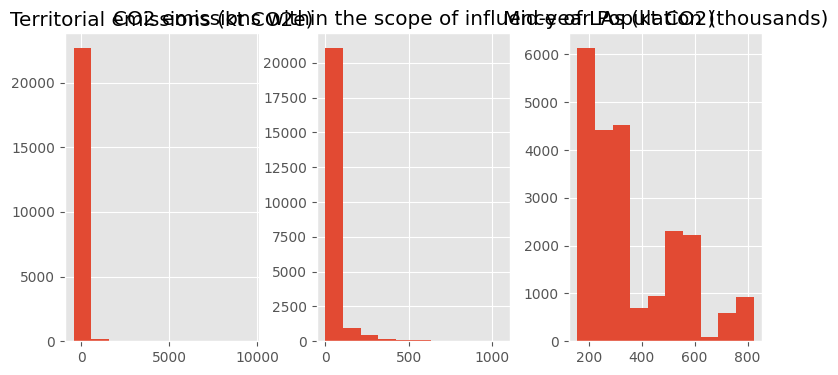

In [ ]:
columns = ['Territorial emissions (kt CO2e)',
       'CO2 emissions within the scope of influence of LAs (kt CO2)', 'Mid-year Population (thousands)']
df_yorkshire[columns].hist(layout=(1, len(columns)), figsize=(3*len(columns), 4))

In [ ]:
df_yorkshire.describe().T.style.background_gradient(cmap = "magma")

### Outliers

In [ ]:
# Calculate quartile
Q1 = df_yorkshire["Territorial emissions (kt CO2e)"].quantile(0.25)
Q3 = df_yorkshire["Territorial emissions (kt CO2e)"].quantile(0.75)
IQR = Q3 - Q1

# Define acceptable range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
# Filter the DataFrame
df_cleaned = df_yorkshire[(df_yorkshire["Territorial emissions (kt CO2e)"] >= lower_bound) &
 (df_yorkshire["Territorial emissions (kt CO2e)"] <= upper_bound)]

In [ ]:
df_cleaned.describe()

Calendar Year  Territorial emissions (kt CO2e)  \
count   18669.000000                     18669.000000   
mean     2013.523167                         3.283830   
std         5.197128                         5.977047   
min      2005.000000                       -12.669482   
25%      2009.000000                         0.062200   
50%      2014.000000                         0.726054   
75%      2018.000000                         3.686196   
max      2022.000000                        30.206433   

       CO2 emissions within the scope of influence of LAs (kt CO2)  \
count                                       18669.000000             
mean                                            1.156528             
std                                             4.218813             
min                                             0.000000             
25%                                             0.000000             
50%                                             0.000000             
75%                                             0.000000             
max                                            30.206433             

       Mid-year Population (thousands)  
count                     18669.000000  
mean                        351.434769  
std                         174.644906  
min                         157.197000  
25%                         207.626380  
50%                         301.299000  
75%                         495.658000  
max                         822.483000

### Territorial emissions (kt CO2e)

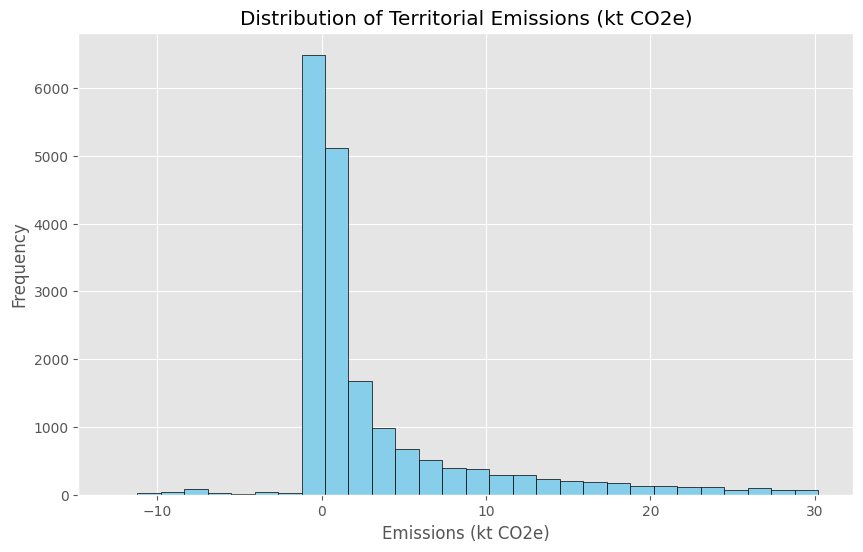

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned["Territorial emissions (kt CO2e)"], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Territorial Emissions (kt CO2e)")
plt.xlabel("Emissions (kt CO2e)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

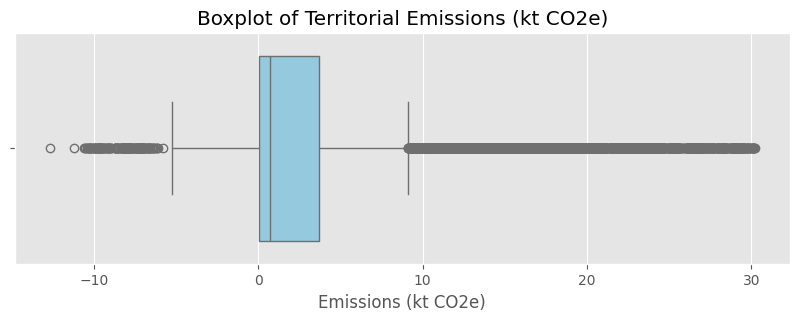

In [ ]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=df_cleaned["Territorial emissions (kt CO2e)"], color='skyblue')
plt.title("Boxplot of Territorial Emissions (kt CO2e)")
plt.xlabel("Emissions (kt CO2e)")
plt.show()

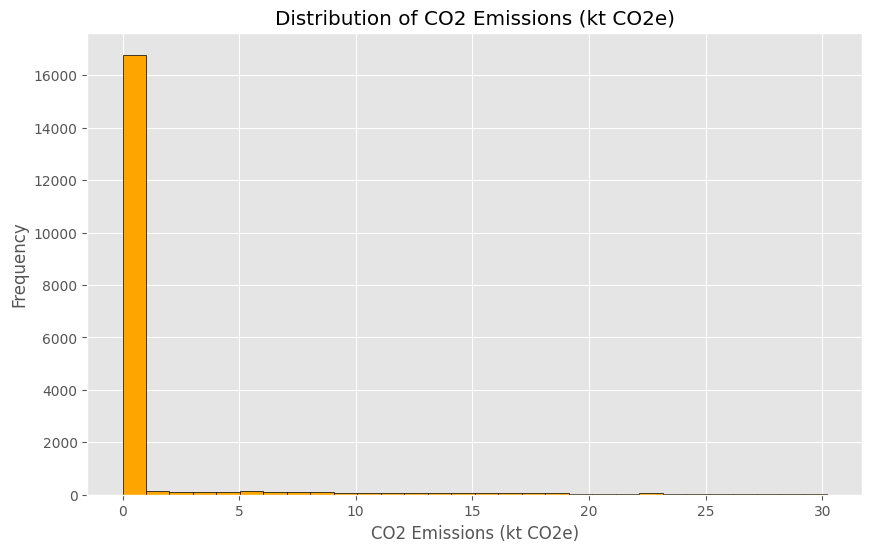

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned["CO2 emissions within the scope of influence of LAs (kt CO2)"], bins=30, color='orange', edgecolor='black')
plt.title("Distribution of CO2 Emissions (kt CO2e)")
plt.xlabel("CO2 Emissions (kt CO2e)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

## Groupby

### Region

In [ ]:
# Group by year to get average UK emissions per year
df_yearly = df_cleaned.groupby("Calendar Year")[["Territorial emissions (kt CO2e)", "Mid-year Population (thousands)"]].mean().reset_index()
df_yearly.columns = ['Year', 'Emissions', 'Population']

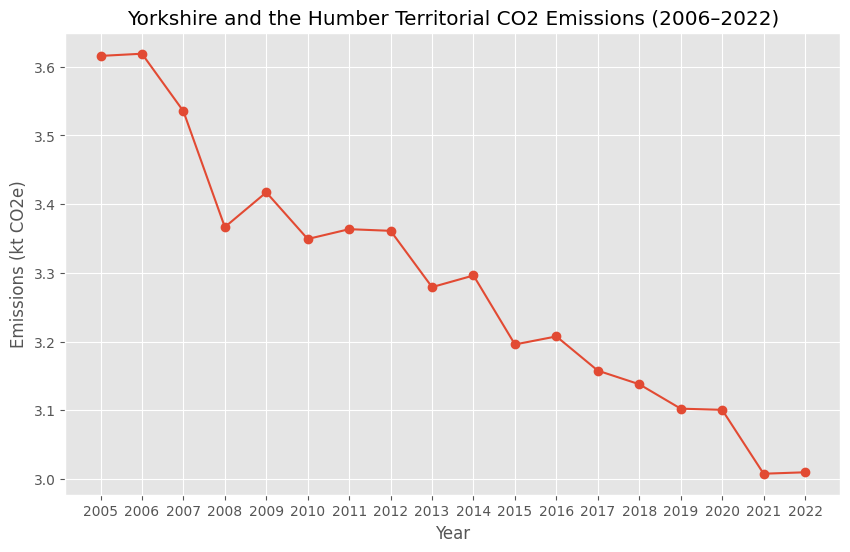

In [ ]:
# Emission plot

plt.figure(figsize=(10, 6))

start_year = 2005
end_year = max(df_yearly["Year"])  # or manually set like 2021, etc.
plt.xticks(range(start_year, end_year + 1, 1))  # step of 1 year

plt.plot(df_yearly["Year"], df_yearly["Emissions"], marker='o')
plt.title("Yorkshire and the Humber Territorial CO2 Emissions (2006–2022)")
plt.xlabel("Year")
plt.ylabel("Emissions (kt CO2e)")
plt.grid(True)
plt.show()

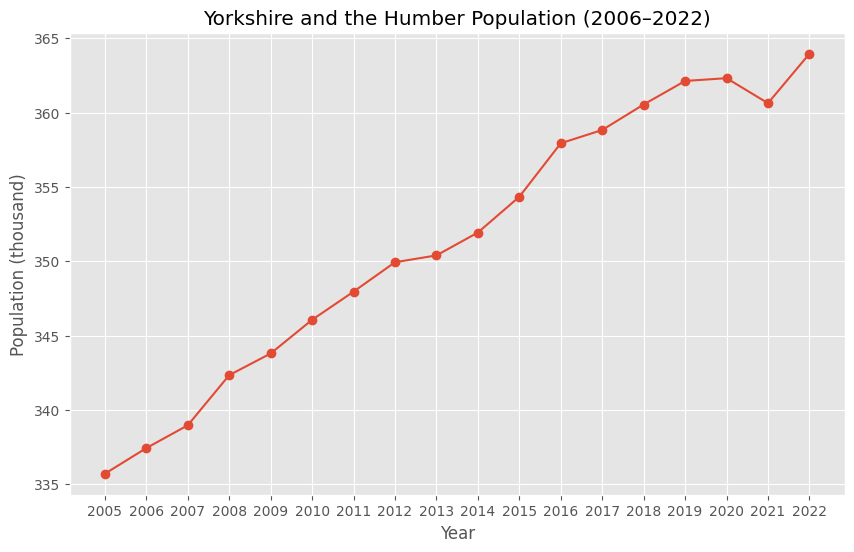

In [ ]:
# Population plot

plt.figure(figsize=(10, 6))

start_year = 2005
end_year = max(df_yearly["Year"])  # or manually set like 2021, etc.
plt.xticks(range(start_year, end_year + 1, 1))  # step of 1 year

plt.plot(df_yearly["Year"], df_yearly["Population"], marker='o')
plt.title("Yorkshire and the Humber Population (2006–2022)")
plt.xlabel("Year")
plt.ylabel("Population (thousand)")
plt.grid(True)
plt.show()

In [ ]:
df_yearly["Year"] = pd.to_datetime(df_yearly["Year"], format='%Y')
df_yearly.set_index("Year", inplace=True)

In [ ]:
print(df_yearly)

            Emissions  Population
Year                             
2005-01-01   3.615853  335.702892
2006-01-01   3.619033  337.427589
2007-01-01   3.535406  338.961108
2008-01-01   3.366688  342.334503
2009-01-01   3.417255  343.792991
2010-01-01   3.349346  346.057340
2011-01-01   3.363650  347.953098
2012-01-01   3.361234  349.931136
2013-01-01   3.279301  350.390936
2014-01-01   3.296243  351.930135
2015-01-01   3.195853  354.335315
2016-01-01   3.207551  357.936026
2017-01-01   3.157727  358.829807
2018-01-01   3.137915  360.543377
2019-01-01   3.102381  362.128214
2020-01-01   3.100683  362.315539
2021-01-01   3.007686  360.631655
2022-01-01   3.009779  363.960428


### Each city

In [ ]:
cities = [
    "Calderdale", "Kirklees", "Doncaster", "Barnsley", "Wakefield",
    "East Riding of Yorkshire", "Sheffield", "North Lincolnshire", "Bradford",
    "Rotherham", "Leeds", "North East Lincolnshire", "York",
    "Kingston"
    ]

In [ ]:
# Create a dictionary to store each city's DataFrame
city_dfs = {}

# Loop through each city and create a DataFrame variable dynamically
for city in cities:
    # Replace spaces and lowercase for valid variable names
    var_name = city.lower().replace(" ", "_") + "_df"

    # Create the DataFrame and assign it to a dynamic variable
    globals()[var_name] = df_cleaned[df_cleaned["Local Authority"] == city]

wakefield_df.head()
#doncaster_df.head()

Region  Calendar Year Local Authority LA GHG Sector  \
387182  Yorkshire and the Humber           2005       Wakefield   Agriculture   
387183  Yorkshire and the Humber           2005       Wakefield   Agriculture   
387184  Yorkshire and the Humber           2005       Wakefield   Agriculture   
387185  Yorkshire and the Humber           2005       Wakefield   Agriculture   
387186  Yorkshire and the Humber           2005       Wakefield   Agriculture   

              LA GHG Sub-sector Greenhouse gas  \
387182  Agriculture Electricity            CO2   
387183  Agriculture Electricity            CH4   
387184  Agriculture Electricity            N2O   
387185          Agriculture Gas            CO2   
387186          Agriculture Gas            CH4   

        Territorial emissions (kt CO2e)  \
387182                         2.384361   
387183                         0.074800   
387184                         0.009620   
387185                         1.464092   
387186                         0.049200   

        CO2 emissions within the scope of influence of LAs (kt CO2)  \
387182                                           2.384361             
387183                                           0.000000             
387184                                           0.000000             
387185                                           1.464092             
387186                                           0.000000             

        Mid-year Population (thousands)  
387182                          318.765  
387183                          318.765  
387184                          318.765  
387185                          318.765  
387186                          318.765

In [ ]:
for city in cities:
    var_name = city.lower().replace(" ", "_") + "_df"
    df = globals()[var_name]

    # Group by year and calculate mean emissions and population for the city
    df_yearly = df.groupby("Calendar Year")[["Territorial emissions (kt CO2e)", "Mid-year Population (thousands)"]].mean().reset_index()
    df_yearly.columns = ['Year', 'Emissions', 'Population']

    # Convert 'Year' to datetime and set as index
    df_yearly["Year"] = pd.to_datetime(df_yearly["Year"], format="%Y")
    df_yearly.set_index("Year", inplace=True)
    df_yearly = df_yearly.asfreq('YS')

    new_var_name = city.lower().replace(" ", "_") + "_yearly_df"
    globals()[new_var_name] = df_yearly

# Example check
wakefield_yearly_df.head()


Emissions  Population
Year                             
2005-01-01   4.036927     318.765
2006-01-01   3.865098     320.318
2007-01-01   3.760830     321.650
2008-01-01   3.590537     323.288
2009-01-01   3.560882     324.467

In [ ]:
print(doncaster_yearly_df)

            Emissions  Population
Year                             
2005-01-01   3.625089  292.174000
2006-01-01   3.587549  293.990000
2007-01-01   4.186790  296.215000
2008-01-01   4.040238  298.388000
2009-01-01   3.978029  300.184000
2010-01-01   3.441141  301.299000
2011-01-01   3.696546  302.468000
2012-01-01   3.693978  302.376651
2013-01-01   3.611484  302.544487
2014-01-01   4.153791  302.670085
2015-01-01   3.699756  303.354218
2016-01-01   4.433882  304.958363
2017-01-01   4.001679  306.065602
2018-01-01   3.931362  307.107740
2019-01-01   3.970603  308.331004
2020-01-01   3.977600  309.189142
2021-01-01   3.891816  308.705000
2022-01-01   4.019838  311.027000


<ipython-input-36-fc1ee10dbdb4>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap("tab20", len(cities))  # 20 different colors


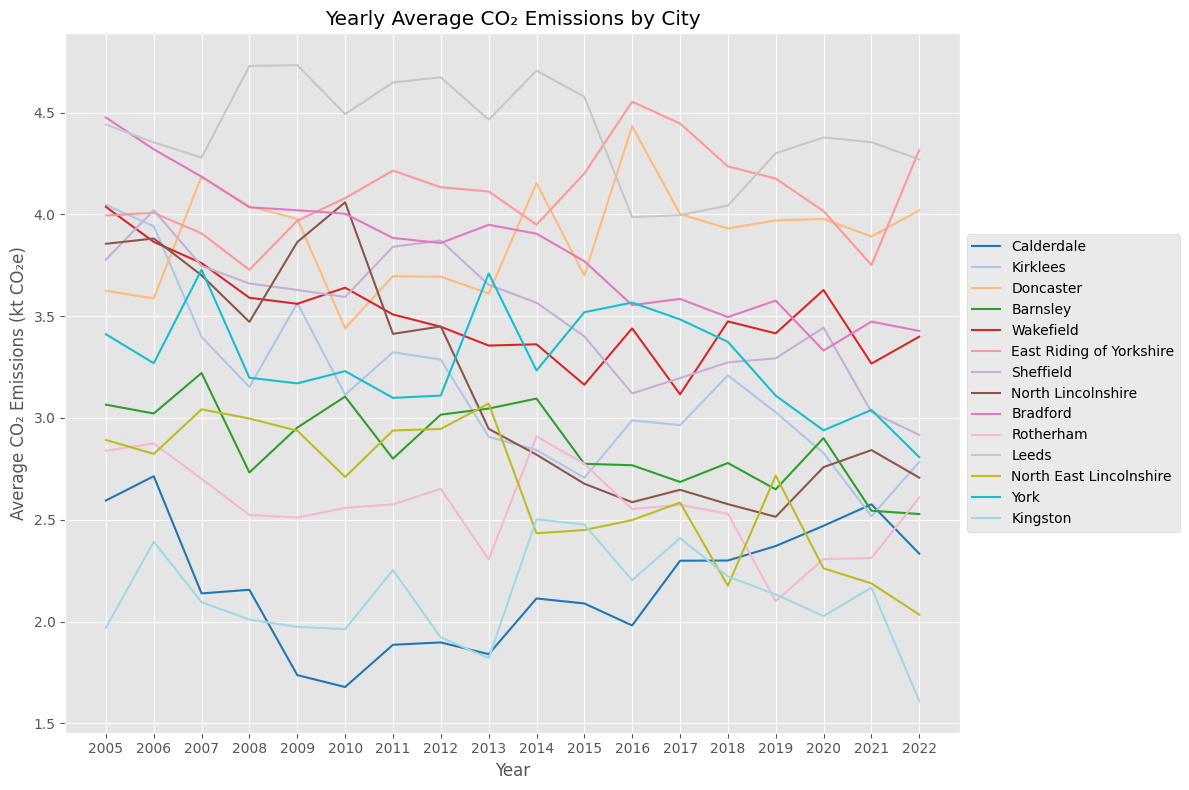

In [ ]:
import matplotlib.cm as cm
import matplotlib.dates as mdates


# Emission of each city
plt.figure(figsize=(12, 8))

# Pick a colormap (e.g., tab10, Set3, viridis, plasma, etc.)
colormap = plt.cm.get_cmap("tab20", len(cities))  # 20 different colors

for idx, city in enumerate(cities):
    var_name = city.lower().replace(" ", "_") + "_yearly_df"
    df = globals()[var_name]
    plt.plot(df.index, df["Emissions"], label=city, color=colormap(idx))

# Format x-axis to show every year
plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))  # every year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # format as '2020', etc.

plt.xlabel("Year")
plt.ylabel("Average CO₂ Emissions (kt CO₂e)")
plt.title("Yearly Average CO₂ Emissions by City")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-37-5ce6dbd8d91d>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap("tab20", len(cities))  # 20 different colors


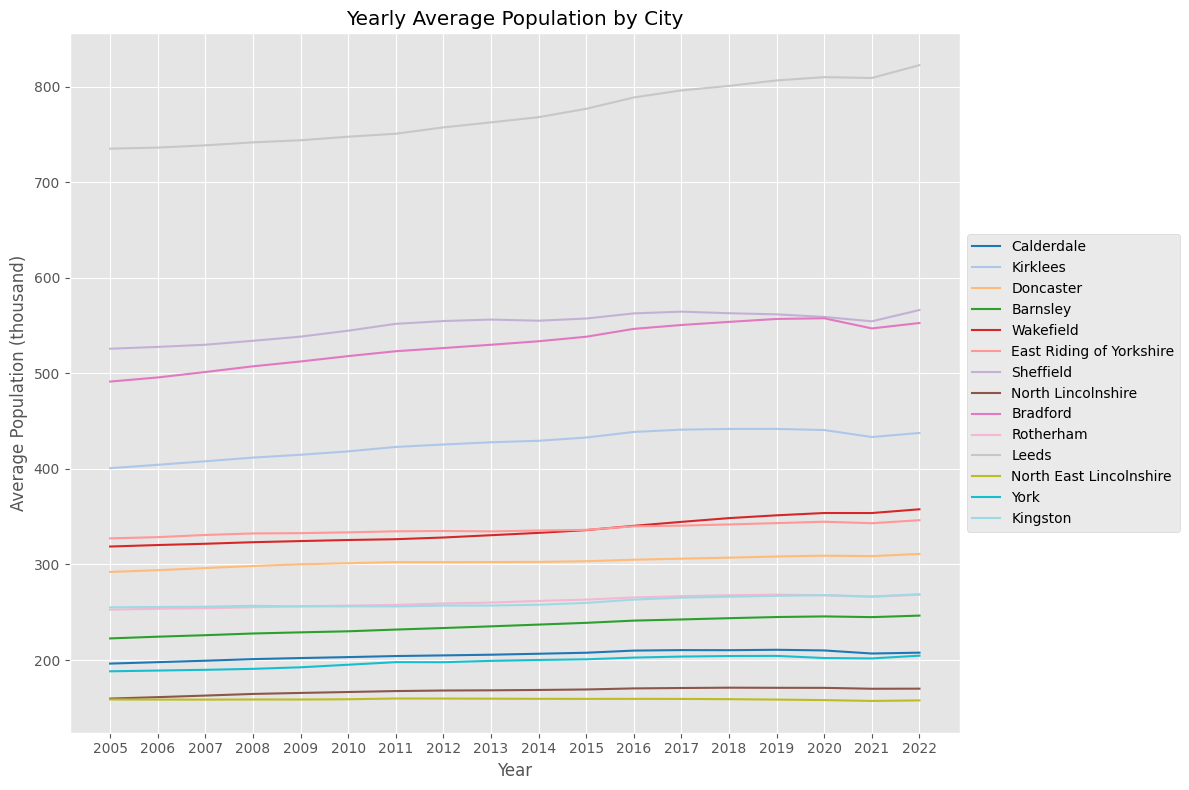

In [ ]:
# Population of each city
plt.figure(figsize=(12, 8))

# Pick a colormap (e.g., tab10, Set3, viridis, plasma, etc.)
colormap = plt.cm.get_cmap("tab20", len(cities))  # 20 different colors

for idx, city in enumerate(cities):
    var_name = city.lower().replace(" ", "_") + "_yearly_df"
    df = globals()[var_name]
    plt.plot(df.index, df["Population"], label=city, color=colormap(idx))

# Format x-axis to show every year
plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))  # every year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # format as '2020', etc.

plt.xlabel("Year")
plt.ylabel("Average Population (thousand)")
plt.title("Yearly Average Population by City")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

## ARIMA

In [ ]:
# Time Series Models
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import pacf, acf

### Calculate differncing (d)

In [ ]:
for city in cities:
    var_name = city.lower().replace(" ", "_") + "_yearly_df"
    df = globals()[var_name].copy()  # Work on a copy to avoid modifying original directly

    # Step 1: Log transformation
    df["Emissions_log_1"] = np.log(df["Emissions"])

    # Step 2: First differencing
    df["Emissions_diff"] = df["Emissions_log_1"].diff()
    df.dropna(subset=["Emissions_diff"], inplace=True)

    # Step 3: ADF test on first difference
    result_diff = adfuller(df["Emissions_diff"])
    p_value = result_diff[1]

    print(f"\n📍 {city}")
    print("ADF Statistic (after 1st differencing):", result_diff[0])
    print("p-value (after 1st differencing):", p_value)

    # Step 4: If not stationary, apply second differencing
    if p_value > 0.05:
        df["Emissions_diff2"] = df["Emissions_diff"].diff()
        df.dropna(subset=["Emissions_diff2"], inplace=True)

        result_diff2 = adfuller(df["Emissions_diff2"])
        p_value2 = result_diff2[1]

        print("⚠️ First differencing not sufficient. Applying second differencing...")
        print("ADF Statistic (after 2nd differencing):", result_diff2[0])
        print("p-value (after 2nd differencing):", p_value2)

        if p_value2 < 0.05:
            print("✅ Series is stationary after **second differencing**")
        else:
            print("❌ Still NOT stationary even after 2nd differencing")

    else:
        print("✅ Series is stationary after **first differencing**")

    # Save modified DataFrame back to globals
    globals()[var_name] = df


📍 Calderdale
ADF Statistic (after 1st differencing): -2.681231393269911
p-value (after 1st differencing): 0.07734274810962995
⚠️ First differencing not sufficient. Applying second differencing...
ADF Statistic (after 2nd differencing): -0.1537522691042113
p-value (after 2nd differencing): 0.9438143747382594
❌ Still NOT stationary even after 2nd differencing

📍 Kirklees
ADF Statistic (after 1st differencing): -0.19736140435332047
p-value (after 1st differencing): 0.938835401034121
⚠️ First differencing not sufficient. Applying second differencing...
ADF Statistic (after 2nd differencing): -3.679411563749822
p-value (after 2nd differencing): 0.004412247519148753
✅ Series is stationary after **second differencing**

📍 Doncaster
ADF Statistic (after 1st differencing): -7.104760796476637
p-value (after 1st differencing): 4.080785288122753e-10
✅ Series is stationary after **first differencing**

📍 Barnsley
ADF Statistic (after 1st differencing): -1.9822594125009816
p-value (after 1st differ

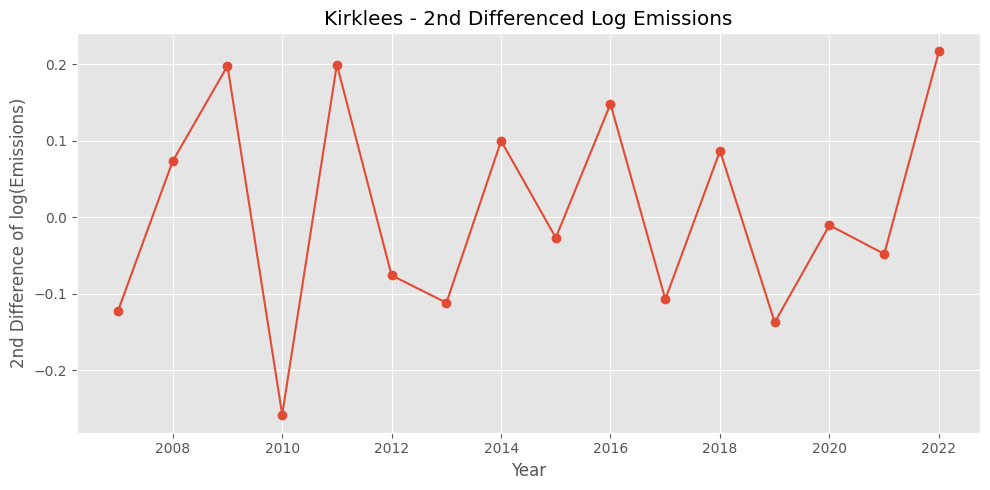

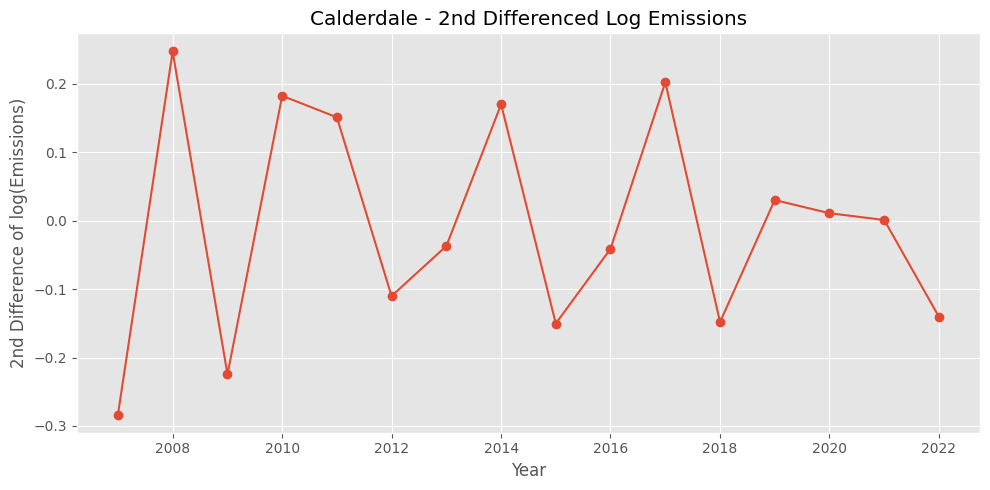

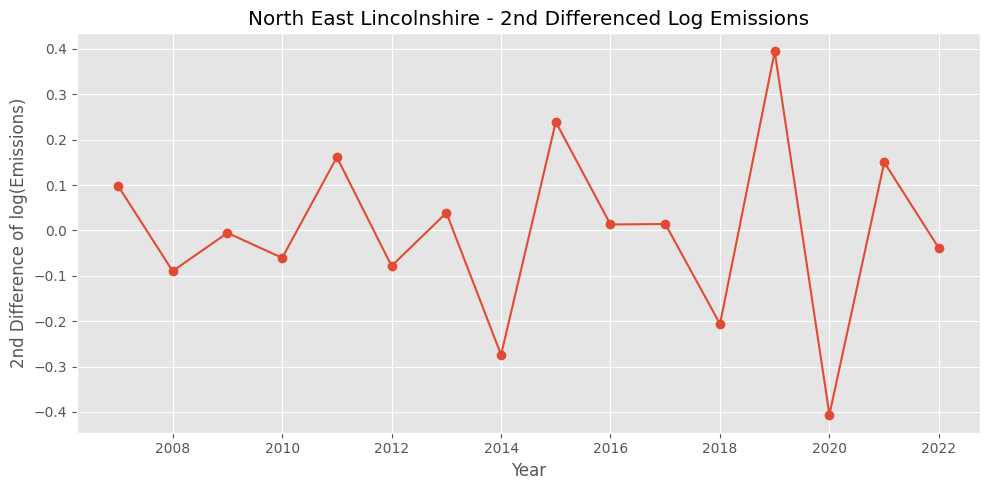

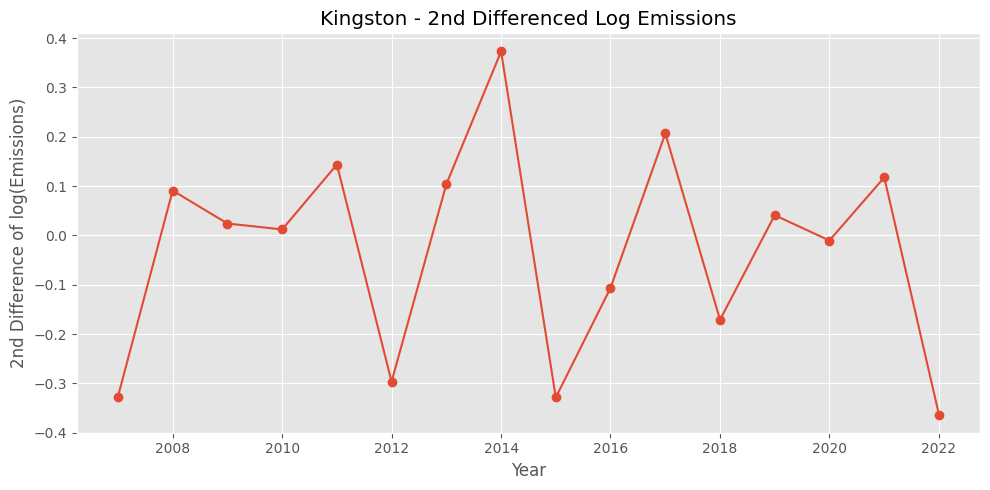

In [ ]:
cities_2 = ["Kirklees", "Calderdale", "North East Lincolnshire", "Kingston"]  # Example cities

for city in cities_2:
    var_name = city.lower().replace(" ", "_").replace(",", "").replace("__", "_") + "_yearly_df"
    df = globals()[var_name]

    plt.figure(figsize=(10, 5))
    plt.plot(df.index, df["Emissions_diff2"], marker='o')
    plt.title(f"{city} - 2nd Differenced Log Emissions")
    plt.xlabel("Year")
    plt.ylabel("2nd Difference of log(Emissions)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Claculate p and q

In [ ]:
cities = [
    "Calderdale", "Kirklees", "Doncaster", "Barnsley", "Wakefield",
    "East Riding of Yorkshire", "Sheffield", "North Lincolnshire", "Bradford",
    "Rotherham", "Leeds", "North East Lincolnshire", "York",
    "Kingston"
    ]

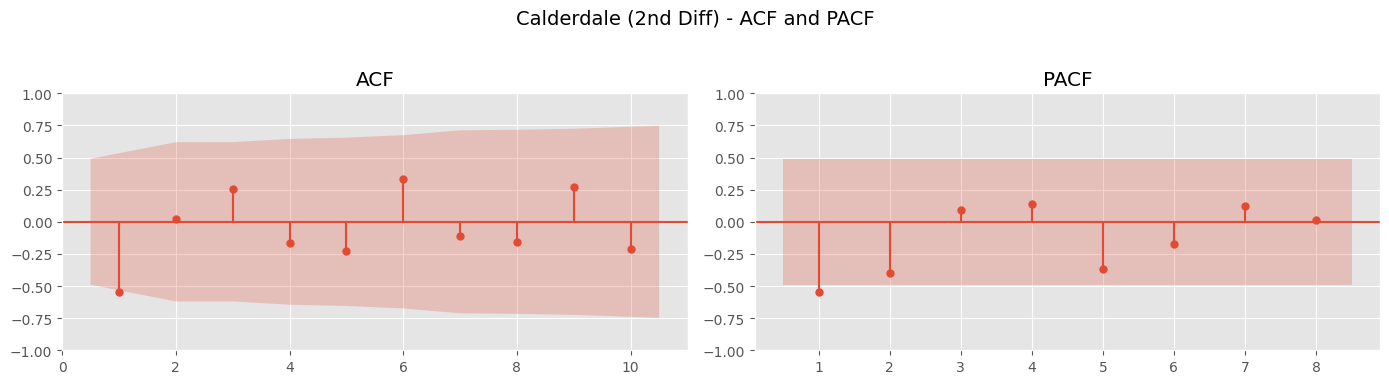

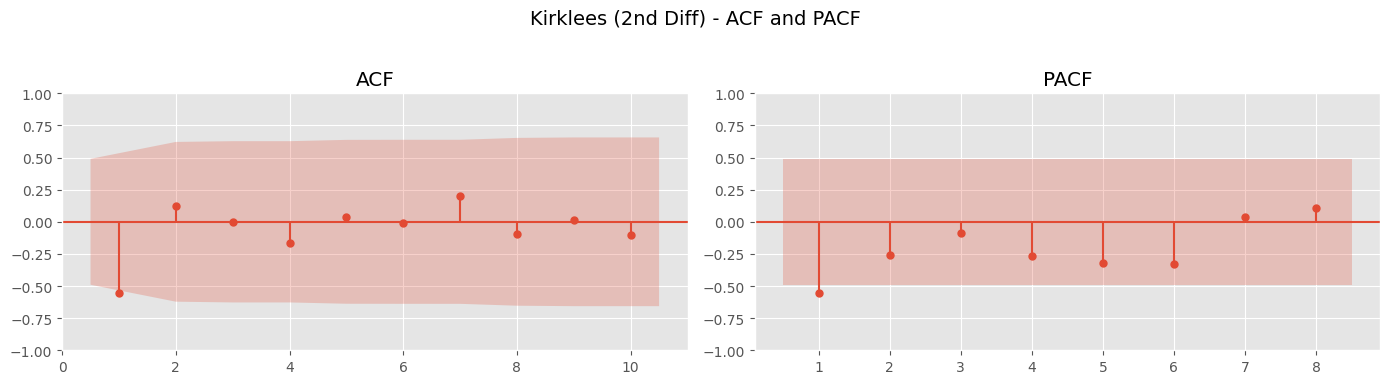

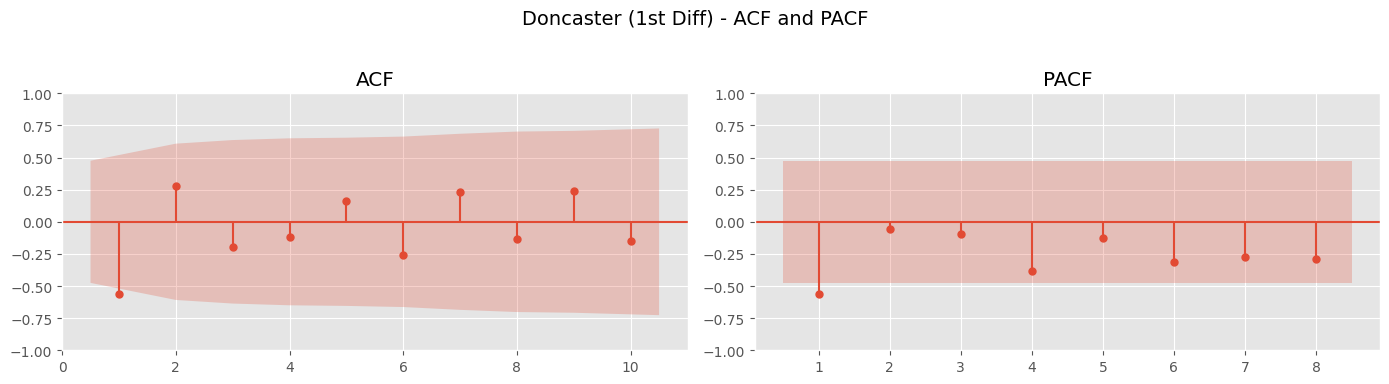

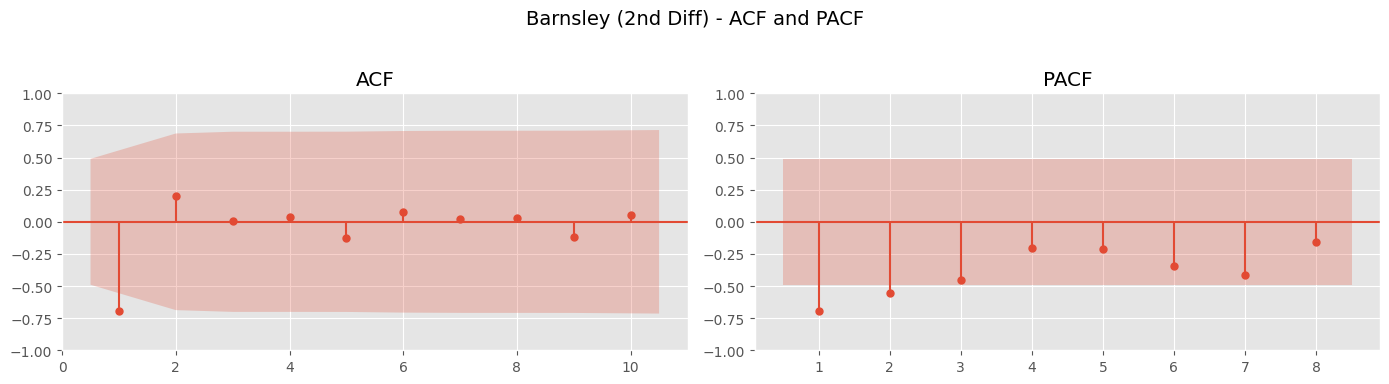

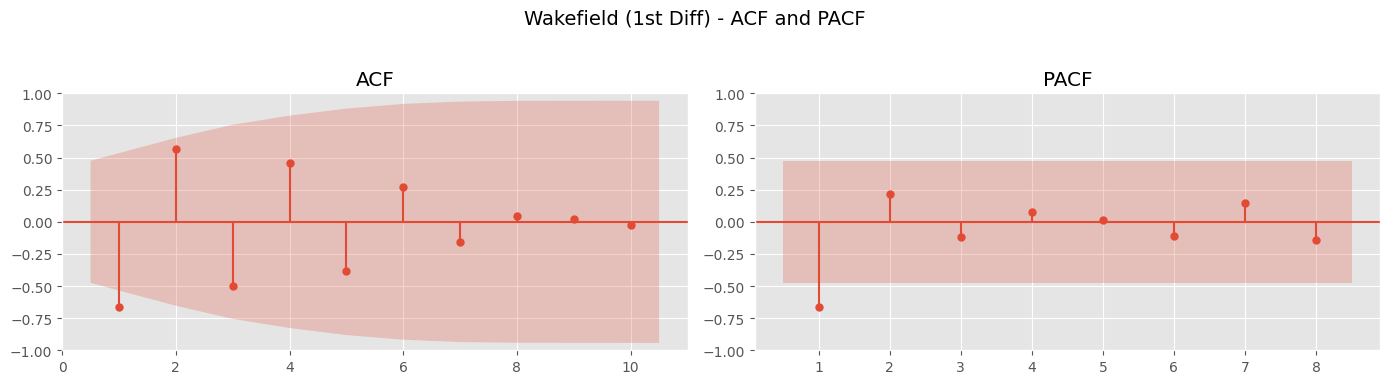

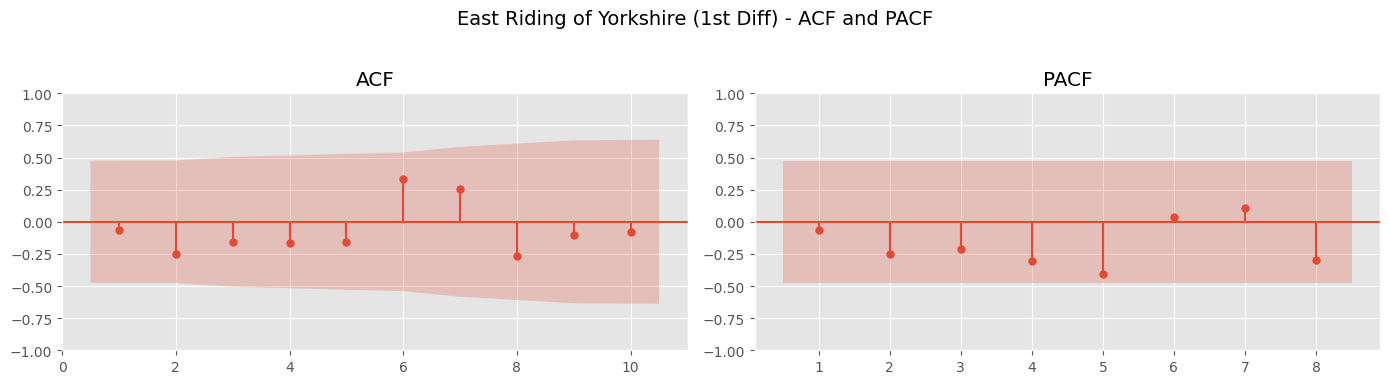

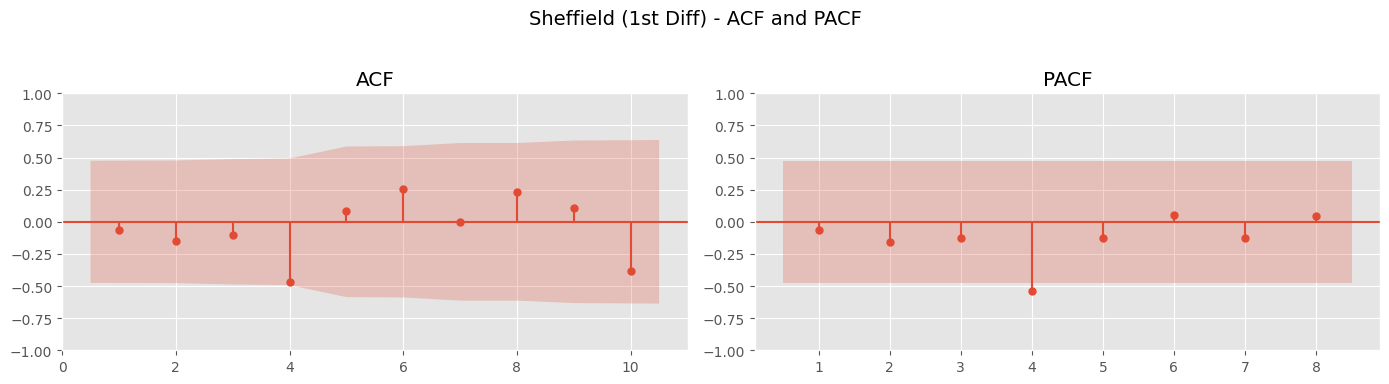

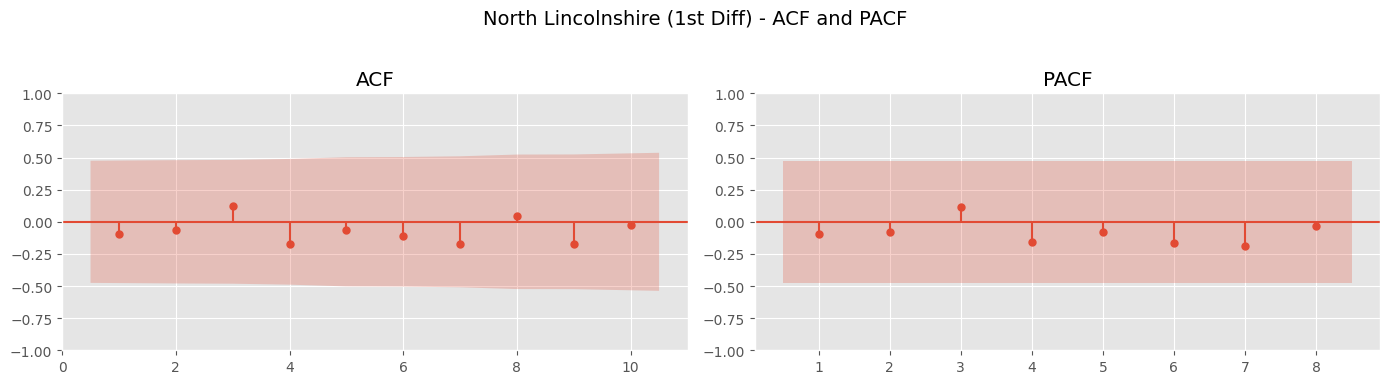

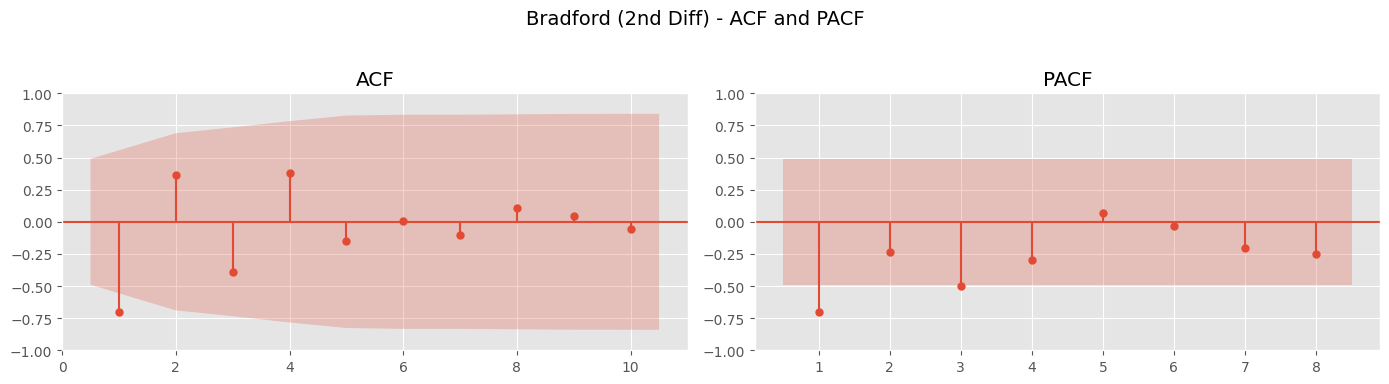

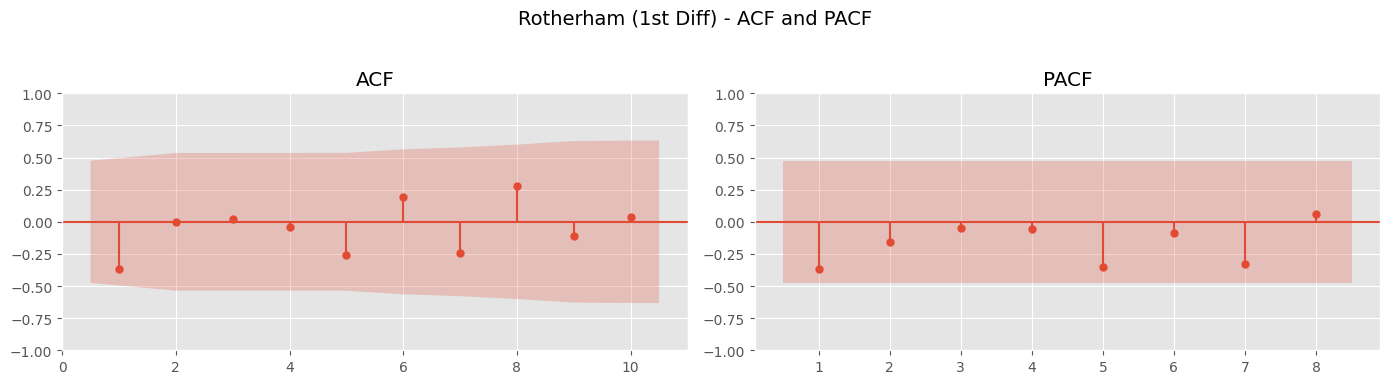

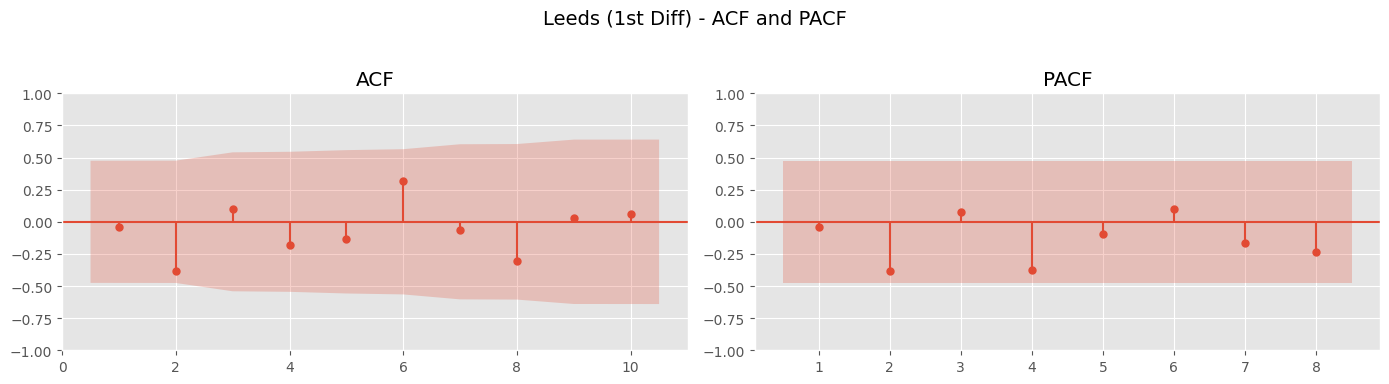

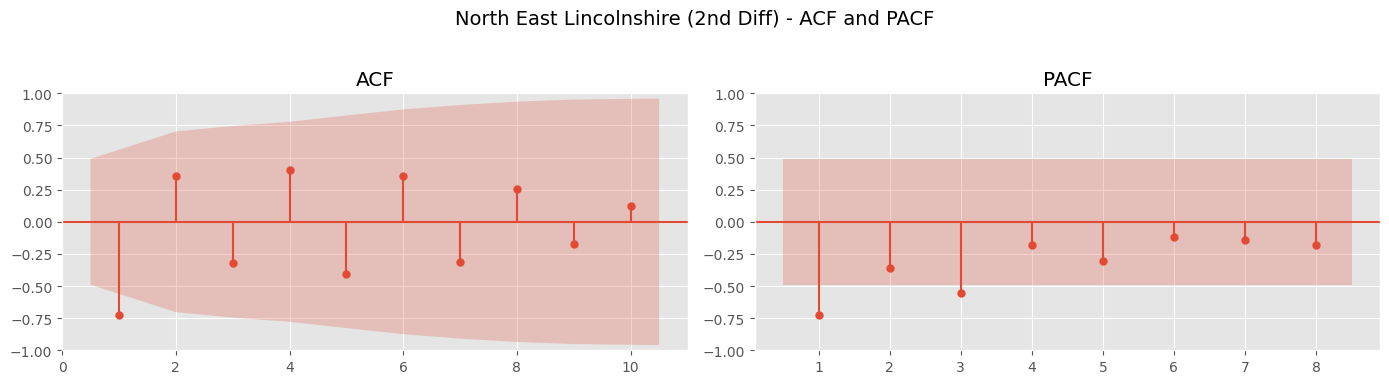

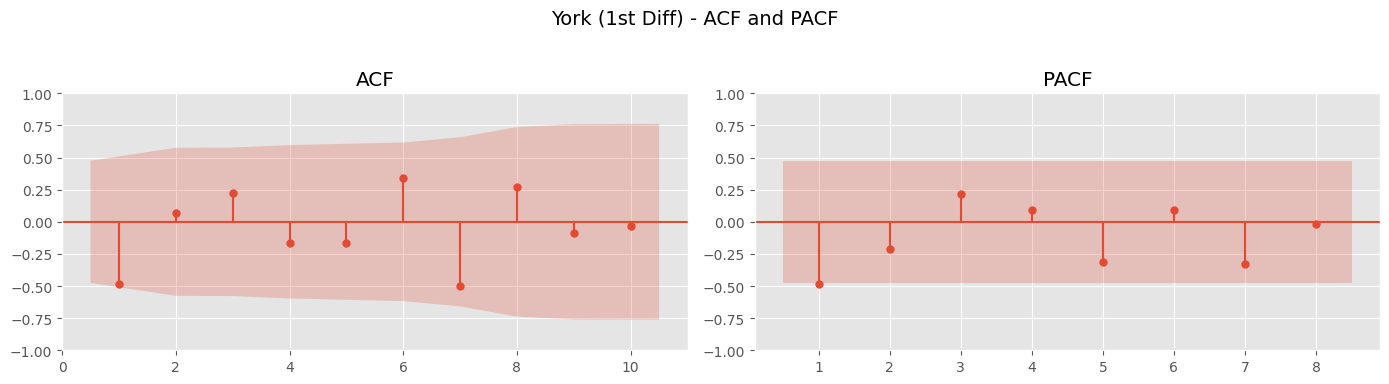

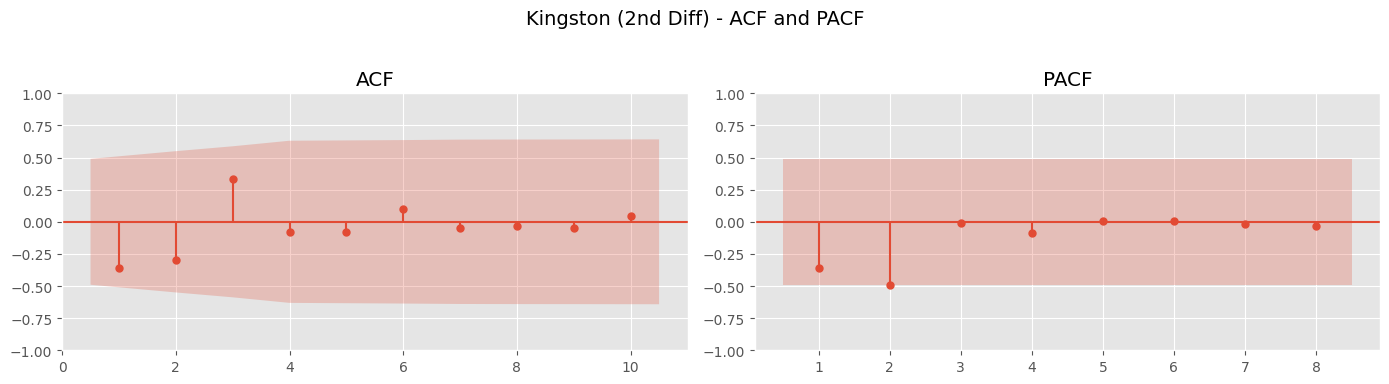

In [ ]:
for city in cities:
    var_name = city.lower().replace(" ", "_") + "_yearly_df"
    df = globals()[var_name]

    # Use second differencing if it exists, otherwise use first
    if "Emissions_diff2" in df.columns:
        series = df["Emissions_diff2"]
        title_note = "(2nd Diff)"
    else:
        series = df["Emissions_diff"]
        title_note = "(1st Diff)"

    # Plot ACF and PACF
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    fig.suptitle(f"{city} {title_note} - ACF and PACF", fontsize=14)

    plot_acf(series, ax=axes[0], lags=10, zero=False)
    plot_pacf(series, ax=axes[1], lags=8, zero=False, method="ywm")

    axes[0].set_title("ACF")
    axes[1].set_title("PACF")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [ ]:
# Calculate ACF and PACF

lag_count = 8  # Number of lags to calculate

for city in cities:
    var_name = city.lower().replace(" ", "_") + "_yearly_df"
    df = globals()[var_name]

    # Use 2nd difference if available, else 1st
    if "Emissions_diff2" in df.columns:
        series = df["Emissions_diff2"].dropna()
        diff_label = "2nd differencing"
    else:
        series = df["Emissions_diff"].dropna()
        diff_label = "1st differencing"

    # Calculate ACF and PACF
    acf_vals = acf(series, nlags=lag_count, fft=False)
    pacf_vals = pacf(series, nlags=lag_count, method="ywm")

    # Print results
    print(f"\n📍 {city} ({diff_label})")
    print("ACF values:")
    for i, val in enumerate(acf_vals):
        print(f"  Lag {i}: {val:.4f}")

    print("PACF values:")
    for i, val in enumerate(pacf_vals):
        print(f"  Lag {i}: {val:.4f}")


📍 Calderdale (2nd differencing)
ACF values:
  Lag 0: 1.0000
  Lag 1: -0.5474
  Lag 2: 0.0196
  Lag 3: 0.2584
  Lag 4: -0.1649
  Lag 5: -0.2308
  Lag 6: 0.3300
  Lag 7: -0.1117
  Lag 8: -0.1543
PACF values:
  Lag 0: 1.0000
  Lag 1: -0.5474
  Lag 2: -0.3999
  Lag 3: 0.0927
  Lag 4: 0.1384
  Lag 5: -0.3635
  Lag 6: -0.1704
  Lag 7: 0.1238
  Lag 8: 0.0157

📍 Kirklees (2nd differencing)
ACF values:
  Lag 0: 1.0000
  Lag 1: -0.5521
  Lag 2: 0.1240
  Lag 3: 0.0015
  Lag 4: -0.1637
  Lag 5: 0.0405
  Lag 6: -0.0132
  Lag 7: 0.1984
  Lag 8: -0.0977
PACF values:
  Lag 0: 1.0000
  Lag 1: -0.5521
  Lag 2: -0.2602
  Lag 3: -0.0863
  Lag 4: -0.2652
  Lag 5: -0.3216
  Lag 6: -0.3267
  Lag 7: 0.0383
  Lag 8: 0.1039

📍 Doncaster (1st differencing)
ACF values:
  Lag 0: 1.0000
  Lag 1: -0.5645
  Lag 2: 0.2779
  Lag 3: -0.1964
  Lag 4: -0.1169
  Lag 5: 0.1605
  Lag 6: -0.2557
  Lag 7: 0.2286
  Lag 8: -0.1314
PACF values:
  Lag 0: 1.0000
  Lag 1: -0.5645
  Lag 2: -0.0597
  Lag 3: -0.0940
  Lag 4: -0.3809
 

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
import numpy as np

cities = [
    "Calderdale", "Kirklees", "Doncaster", "Barnsley", "Wakefield",
    "East Riding of Yorkshire", "North Lincolnshire", "Bradford",
    "Rotherham", "Leeds", "North East Lincolnshire", "York",
    "Kingston", "Sheffield"
]

lag_count = 5  # number of lags to check
pq_results = []

for city in cities:
    var_name = city.lower().replace(" ", "_") + "_yearly_df"
    df = globals()[var_name]

    # Use 2nd differencing if available
    if "Emissions_diff2" in df.columns:
        series = df["Emissions_diff2"].dropna()
        diff_label = "2nd"
    else:
        series = df["Emissions_diff"].dropna()
        diff_label = "1st"

    n = len(series)
    conf_interval = 1.96 / np.sqrt(n)

    acf_vals = acf(series, nlags=lag_count, fft=False)
    pacf_vals = pacf(series, nlags=lag_count, method="ywm")

    # Find first lag where value drops below threshold
    p = next((i for i, val in enumerate(pacf_vals[1:], 1) if abs(val) < conf_interval), 0)
    q = next((i for i, val in enumerate(acf_vals[1:], 1) if abs(val) < conf_interval), 0)

    pq_results.append((city, diff_label, p, q))

# Display results
print(f"{'City':<30} {'Differencing':<10} {'p':<3} {'q':<3}")
print("-" * 50)
for city, diff, p, q in pq_results:
    print(f"{city:<30} {diff:<10} {p:<3} {q:<3}")


City                           Differencing p   q  
--------------------------------------------------
Calderdale                     2nd        2   2  
Kirklees                       2nd        2   2  
Doncaster                      1st        2   2  
Barnsley                       2nd        3   2  
Wakefield                      1st        2   4  
East Riding of Yorkshire       1st        1   1  
North Lincolnshire             1st        1   1  
Bradford                       2nd        2   2  
Rotherham                      1st        1   1  
Leeds                          1st        1   1  
North East Lincolnshire        2nd        2   2  
York                           1st        2   2  
Kingston                       2nd        1   1  
Sheffield                      1st        1   1  


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

# set parameters for p, d, q of each city.
city_arima_params = {
    "Calderdale": (2, 2, 2),
    "Kirklees": (2, 2, 2),
    "Doncaster": (1, 2, 2),
    "Barnsley": (2, 3, 2),
    "Wakefield": (1, 2, 4),
    "East Riding of Yorkshire": (1, 1, 1),
    "North Lincolnshire": (1, 1, 1),
    "Bradford": (2, 2, 2),
    "Rotherham": (1, 1, 1),
    "Leeds": (1, 1, 1),
    "North East Lincolnshire": (2, 2, 2),
    "York": (1, 2, 2),
    "Kingston": (2, 1, 1),
    "Sheffield": (1, 1, 1),
}

results = []

for city, (p, d, q) in city_arima_params.items():
    var_name = city.lower().replace(" ", "_") + "_yearly_df"
    df = globals()[var_name]

    # Use original emissions for fitting (log transform inside model)
    y = np.log(df["Emissions"])

    # Fit ARIMA
    try:
        model = ARIMA(y, order=(p, d, q))
        model_fit = model.fit()

        # AIC and BIC
        aic = model_fit.aic
        bic = model_fit.bic

        # Predict in log-scale
        y_pred_log = model_fit.predict(start=d, end=len(y)-1, typ='levels')

        # Back-transform to original scale
        y_pred = np.exp(y_pred_log)

        # True values in original scale
        y_true = df["Emissions"][d:]

        # MAPE (use in-sample prediction)
        mape = mean_absolute_percentage_error(y_true, y_pred) * 100 # in percentage

        results.append({
            "City": city,
            "p": p,
            "d": d,
            "q": q,
            "AIC": aic,
            "BIC": bic,
            "MAPE": round(mape * 100, 2)
        })

    except Exception as e:
        results.append({
            "City": city,
            "p": p,
            "d": d,
            "q": q,
            "AIC": None,
            "BIC": None,
            "MAPE": None,
            "Error": str(e)
        })

# Create results table
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="MAPE")


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/s

In [ ]:
# Show table
print("\n📊 ARIMA Model Evaluation Summary:\n")
print(results_df[["City", "p", "d", "q", "AIC", "BIC", "MAPE"]].to_string(index=False))


📊 ARIMA Model Evaluation Summary:

                    City  p  d  q        AIC        BIC    MAPE
                Bradford  2  2  2 -48.166803 -44.971517  259.47
               Wakefield  1  2  4 -37.602334 -33.354032  334.29
               Sheffield  1  1  1 -44.743382 -42.425616  370.96
                   Leeds  1  1  1 -44.574377 -42.256611  376.63
East Riding of Yorkshire  1  1  1 -43.771618 -41.453852  400.38
      North Lincolnshire  1  1  1 -30.656422 -28.338656  633.15
               Rotherham  1  1  1 -27.190407 -24.872641  660.06
               Doncaster  1  2  2 -23.371748 -20.539547  708.68
                    York  1  2  2 -22.754089 -19.921889  742.37
              Calderdale  2  2  2 -21.951254 -18.755967  743.38
                Kirklees  2  2  2 -18.385004 -15.189718  782.29
 North East Lincolnshire  2  2  2 -13.495505 -10.300219  828.23
                Kingston  2  1  1 -13.555181 -10.722980  900.09
                Barnsley  2  3  2  -8.681310  -5.856563 1168.84


The main problem of the ARIMA model with this dataset is that the dataset contains the annual values (eg. 2005, 2006, ...), but doesn't has the value per month (eg. 01-2005, 02-2005,...). So the algorithm cannot identify the "pattern" or "stationary" of this dataset. That is why we have a problem with diffencing in the first place.  


After we **force** to perform ARIMA model, we found that the model cannnot explain the variables of this dataset. MAPE (mean absolute percentage error - Lower is better.) shows that all models have over 100% of error, which indicate very poor predictive accuracy. This is the reason to not perform the prediction step.

## Linear regression

Since the dataset contains only few variables (eg. emissions, population). Linear regression can be applied to analyse the linear relationship data and predict the emeission level by 2050.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import numpy as np
import pandas as pd

# Store results
lr_eval_results = []

for city in cities:
    var_name = city.lower().replace(" ", "_").replace(",", "").replace("__", "_") + "_yearly_df"
    df = globals()[var_name].copy()

    # Ensure 'Year' is numeric
    if df.index.name == "Year":
        df["Year"] = df.index.year
    elif "Year" in df.columns and not np.issubdtype(df["Year"].dtype, np.number):
        df["Year"] = pd.to_datetime(df["Year"]).dt.year

    # Drop rows with missing data
    df = df.dropna(subset=["Emissions", "Population"])

    # Features and target
    X = df[["Year", "Population"]].values
    y = df["Emissions"].values

    # Fit linear regression
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    # Metrics
    r2 = r2_score(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    mae = mean_absolute_error(y, y_pred)
    mape = mean_absolute_percentage_error(y, y_pred) * 100  # in %

    # Forecast for 2050 using last known population
    last_population = df["Population"].iloc[-1]
    pred_2050 = model.predict(np.array([[2050, last_population]]))[0]

    lr_eval_results.append({
        "City": city,
        "Year Coef": model.coef_[0],
        "Pop Coef": model.coef_[1],
        "Intercept": model.intercept_,
        "R²": r2,
        "RMSE": rmse,
        "MAE": mae,
        "MAPE (%)": mape,
        "2050 Prediction": pred_2050
    })

# Create DataFrame of evaluation results
lr_eval_df_2 = pd.DataFrame(lr_eval_results).sort_values(by="MAPE (%)")
print(lr_eval_df_2.round(2))


                        City  Year Coef  Pop Coef  Intercept    R²  RMSE  \
7                   Bradford      -0.03     -0.01      67.33  0.93  0.07   
4                  Wakefield      -0.13      0.04     252.09  0.66  0.11   
9                      Leeds       0.18     -0.03    -324.37  0.64  0.15   
13                 Sheffield      -0.06      0.00     126.53  0.75  0.15   
5   East Riding of Yorkshire      -0.01      0.02      12.99  0.14  0.20   
3                   Barnsley      -0.05      0.01     103.48  0.49  0.14   
2                  Doncaster       0.05     -0.04     -84.36  0.10  0.23   
10   North East Lincolnshire      -0.06      0.07     105.90  0.74  0.17   
1                   Kirklees      -0.06      0.01     123.94  0.55  0.18   
11                      York      -0.07      0.06     142.59  0.31  0.21   
8                  Rotherham      -0.03      0.01      55.96  0.23  0.18   
6         North Lincolnshire      -0.04     -0.09     104.67  0.77  0.25   
0           

- Coefficient	= Slope of the regression line (change in emissions per year). Negative values = emissions decreasing over time.
- Intercept	Emissions level at year 0 (extrapolated). Not as important here, just part of the model.
- R²	= Proportion of variance explained by the model. Closer to 1 is better. Below 0.5 often indicates poor fit.
- RMSE = Root Mean Squared Error — average magnitude of error. Lower is better.
- MAE	= Mean Absolute Error — also lower is better. Less sensitive to outliers than RMSE.
- MAPE	= Mean Absolute Percentage Error — good for interpretability in %. Under 5% is generally good.

Top 5 Best City Models (based on R², RMSE, MAE, and MAPE):

1. Bradford

- R²: 0.93 (Very high, meaning the model explains 93% of the variance in emissions)
- RMSE: 0.07 (Very low, indicating predictions are close to actual values)
- MAE: 0.05 (Very low, meaning average errors are small)
- MAPE: 1.43% (Low, indicating small relative error)
- 2050 Prediction: 2.58 (The model predicts reasonable emissions for 2050)

2. Sheffield

- R²: 0.75 (Good, meaning the model explains 75% of the variance in emissions)
- RMSE: 0.15 (Moderate, but still acceptable)
- MAE: 0.13 (Moderate)
- MAPE: 3.69% (Acceptable)
- 2050 Prediction: 1.31 (A reasonable prediction)

3. North Lincolnshire

- R²: 0.77 (Good)
- RMSE: 0.25 (Moderate, slightly higher than others but still reasonable)
- MAE: 0.21 (Moderate)
- MAPE: 6.75% (Acceptable, but on the higher end)
- 2050 Prediction: 1.38 (Reasonable)

3. North East Lincolnshire
- R²: 0.74 (Good)
- RMSE: 0.17 (Low)
- MAE: 0.13 (Low)
- MAPE: 5.00% (Acceptable)
- 2050 Prediction: 0.54 (Reasonable)

4. Wakefield
- R²: 0.66 (Decent, though lower than others)
- RMSE: 0.11 (Low)
- MAE: 0.08 (Low)
- MAPE: 2.38% (Acceptable)
- 2050 Prediction: -0.32 (Slightly unrealistic due to negative emissions, but overall a reasonable model)

Worst City Model:
Kingston
- R²: 0.01 (Very low, almost no explanatory power)
- RMSE: 0.23 (Moderate, but the R² indicates poor model fit)
- MAE: 0.18 (Moderate)
- MAPE: 8.92% (High, indicating large relative errors)
- 2050 Prediction: 2.57 (A prediction that might not be realistic considering the model's poor performance)

Summary:
- Best Models: Bradford leads with the best performance (high R², low RMSE, low MAE, low MAPE), followed by Sheffield and North Lincolnshire.

- Worst Model: Kingston has the worst performance with extremely low R² and high MAPE, indicating that the model is not accurately predicting emissions.


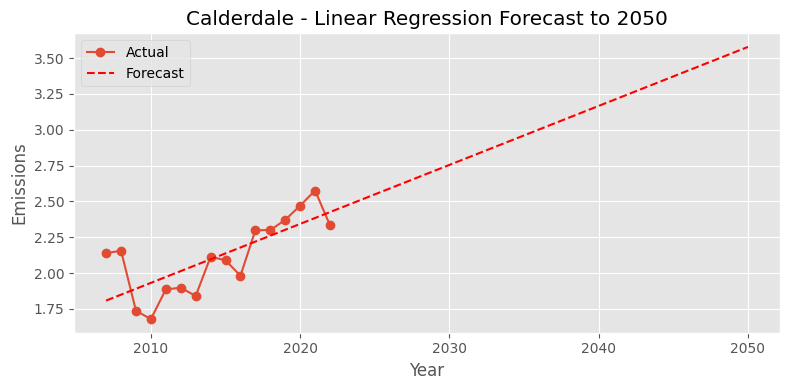

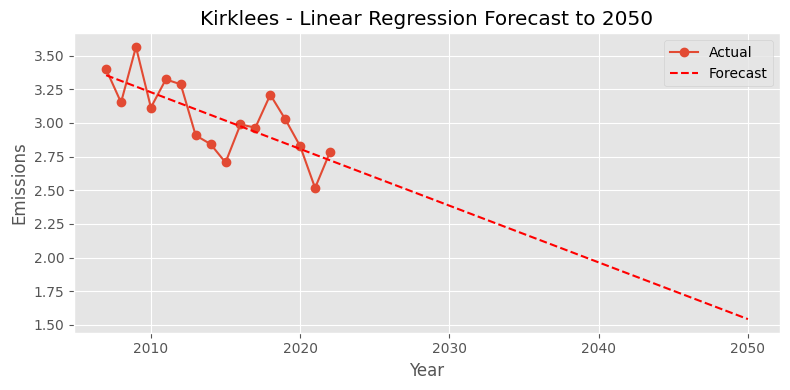

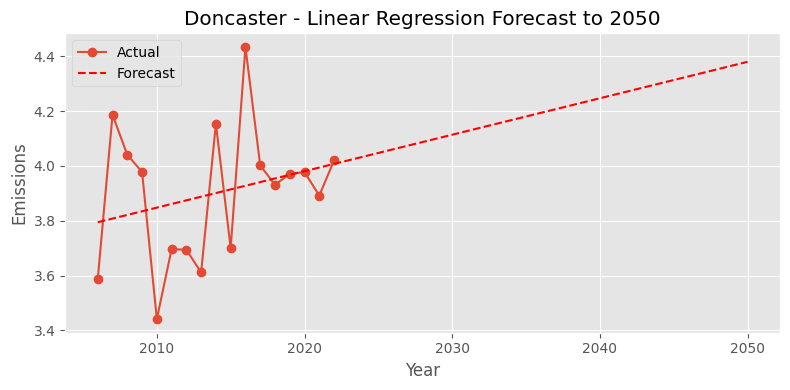

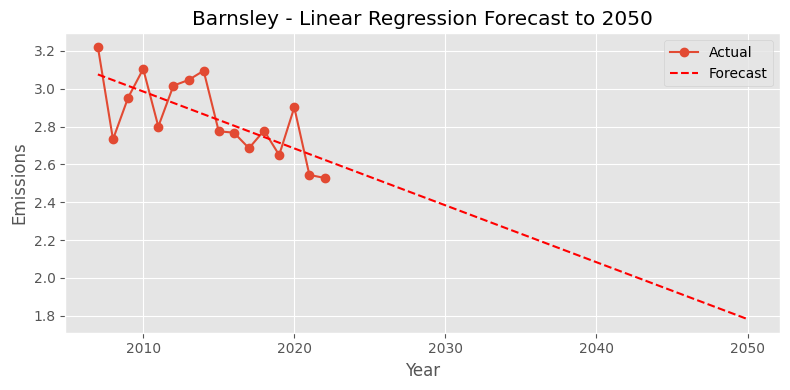

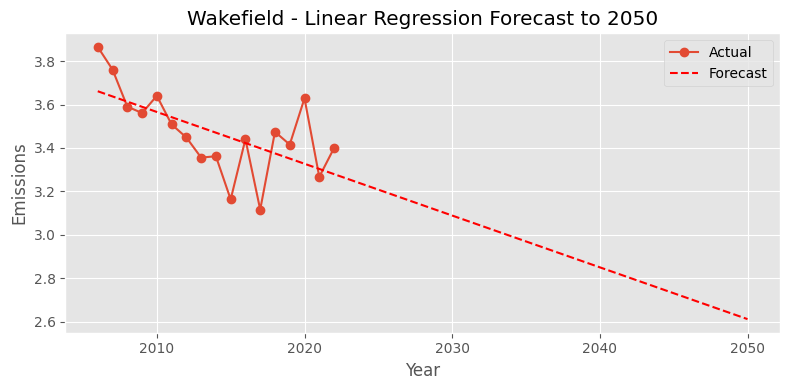

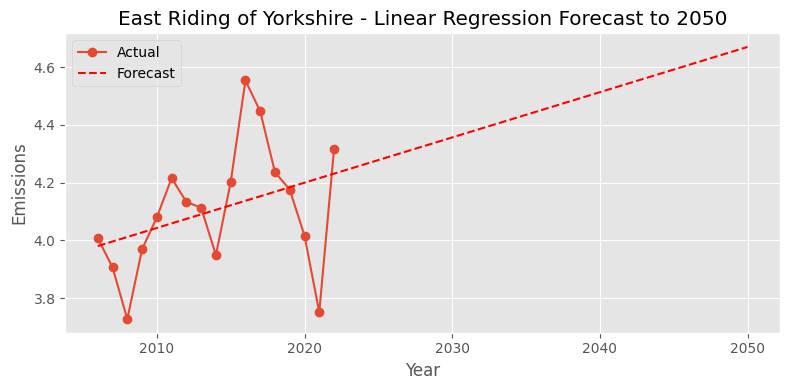

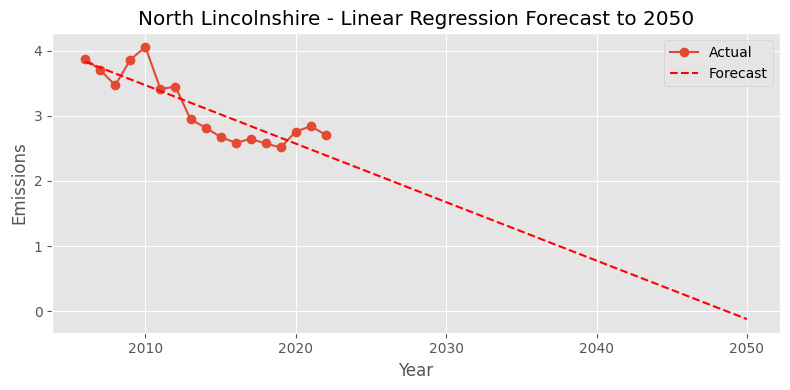

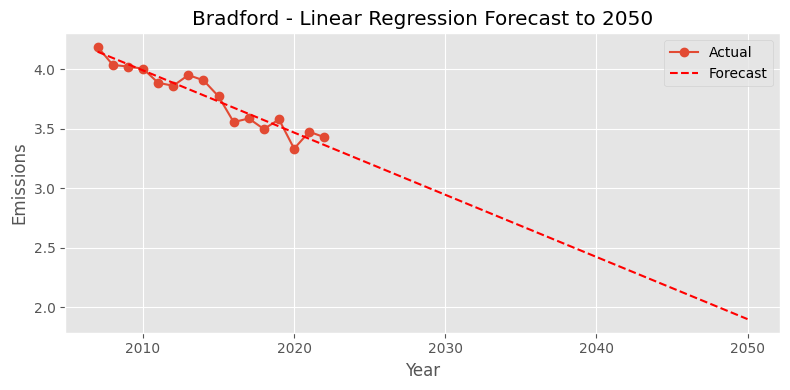

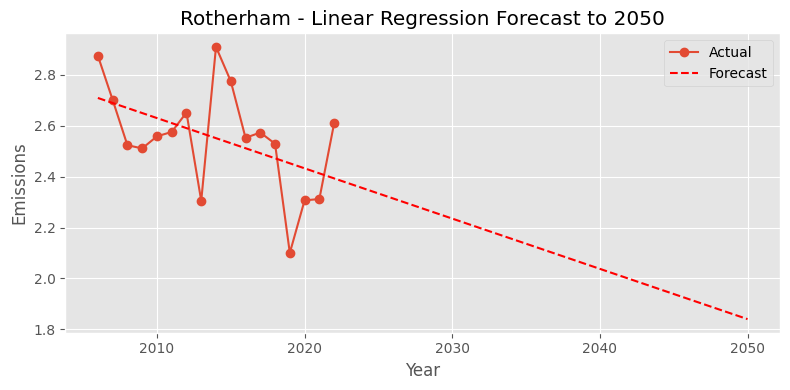

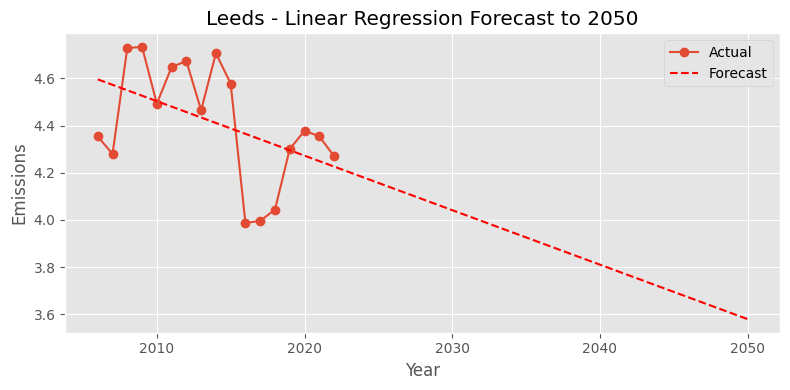

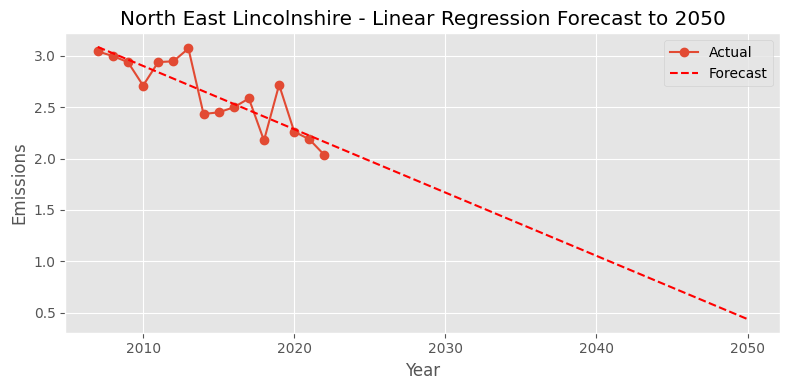

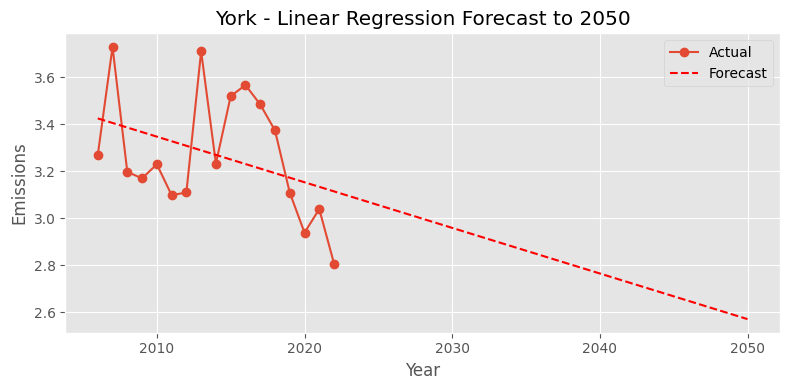

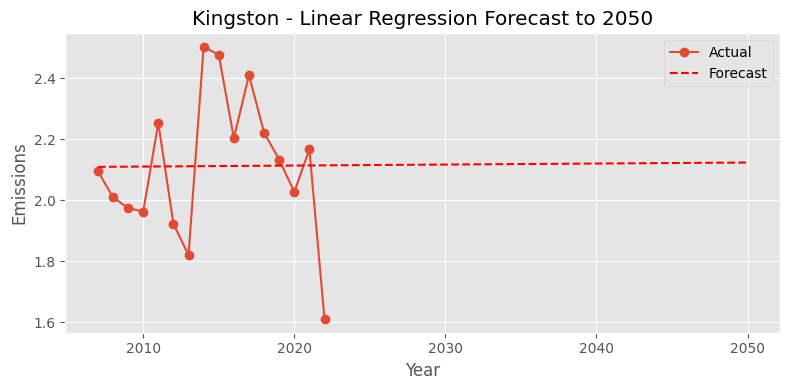

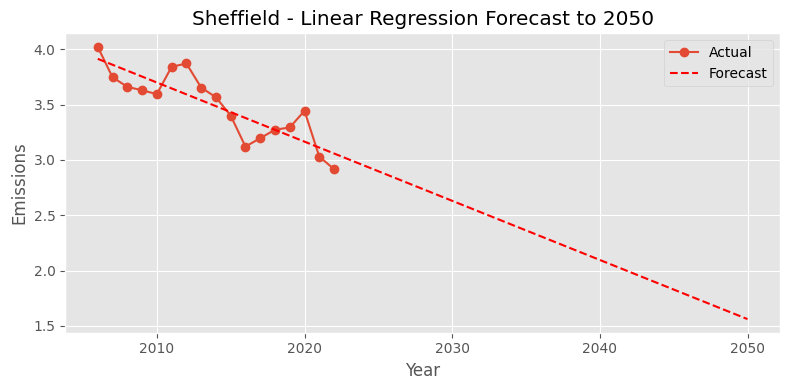

In [ ]:
import matplotlib.pyplot as plt

for city in cities:
    var_name = city.lower().replace(" ", "_").replace(",", "").replace("__", "_") + "_yearly_df"
    df = globals()[var_name].copy()

    if df.index.name == "Year":
        df["Year"] = df.index.year

    X = df["Year"].values.reshape(-1, 1)
    y = df["Emissions"].values

    model = LinearRegression()
    model.fit(X, y)

    future_years = np.arange(df["Year"].min(), 2051).reshape(-1, 1)
    y_pred = model.predict(future_years)

    plt.figure(figsize=(8, 4))
    plt.plot(df["Year"], y, label="Actual", marker='o')
    plt.plot(future_years, y_pred, label="Forecast", linestyle="--", color="red")
    plt.title(f"{city} - Linear Regression Forecast to 2050")
    plt.xlabel("Year")
    plt.ylabel("Emissions")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [ ]:
# Save linear regression results into csv file
lr_eval_df_2.to_csv("linear_regression_results_2.csv", index=False)

## Polynomial regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Store results
poly_eval_results = []

for city in cities:
    var_name = city.lower().replace(" ", "_").replace(",", "").replace("__", "_") + "_yearly_df"
    df = globals()[var_name].copy()

    # Ensure 'Year' is numeric
    if df.index.name == "Year":
        df["Year"] = df.index.year
    elif "Year" in df.columns and not np.issubdtype(df["Year"].dtype, np.number):
        df["Year"] = pd.to_datetime(df["Year"]).dt.year

    # Drop rows with missing values (just in case)
    df = df.dropna(subset=["Emissions", "Population"])

    # Features and target
    X = df[["Year", "Population"]].values
    y = df["Emissions"].values

    # Polynomial features (e.g., degree 2)
    poly = PolynomialFeatures(degree=2, include_bias=False)
    X_poly = poly.fit_transform(X)

    # Fit model
    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)

    # Metrics
    r2 = r2_score(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    mae = mean_absolute_error(y, y_pred)
    mape = mean_absolute_percentage_error(y, y_pred) * 100  # in %

    # Forecast 2050 with the latest population (or estimated if needed)
    pop_2050 = df["Population"].iloc[-1]  # you can change this to a projection if you have one
    X_2050 = poly.transform([[2050, pop_2050]])
    pred_2050 = model.predict(X_2050)[0]

    poly_eval_results.append({
        "City": city,
        "Coef": model.coef_[0],
        "Intercept": model.intercept_,
        "R²": r2,
        "RMSE": rmse,
        "MAE": mae,
        "MAPE (%)": mape,
        "2050 Prediction": pred_2050
    })

# Create DataFrame of evaluation results
poly_eval_df = pd.DataFrame(poly_eval_results).sort_values(by="MAPE (%)")
print(poly_eval_df.round(2))


                        City    Coef  Intercept    R²  RMSE   MAE  MAPE (%)  \
7                   Bradford   62.81  -61364.13  0.95  0.05  0.05      1.27   
4                  Wakefield -125.63  116388.07  0.79  0.09  0.07      1.94   
9                      Leeds  320.32 -300877.44  0.73  0.13  0.11      2.56   
5   East Riding of Yorkshire  373.30 -323504.84  0.64  0.13  0.11      2.58   
3                   Barnsley  515.79 -481596.23  0.63  0.12  0.10      3.34   
13                 Sheffield  -19.75   19563.03  0.78  0.14  0.12      3.50   
1                   Kirklees  -88.64   89762.32  0.73  0.14  0.11      3.60   
2                  Doncaster  352.47 -293747.44  0.39  0.19  0.14      3.61   
11                      York  -45.25   35398.75  0.57  0.17  0.13      3.94   
0                 Calderdale   62.56  -60108.34  0.84  0.10  0.09      4.19   
6         North Lincolnshire -131.16  124654.88  0.88  0.18  0.14      4.21   
10   North East Lincolnshire   -8.89    9157.68  0.7

Top 5 Best City Models:

1. Bradford:
- R²: 0.95 (Excellent fit, meaning the model explains 95% of the variance in emissions)
- RMSE: 0.05 (Extremely low, meaning the model's predictions are very close to actual values)
- MAE: 0.05 (Very low, indicating minimal errors on average)
- MAPE: 1.27% (Very low, indicating the relative error is very small)
- 2050 Prediction: -12.26 (The prediction for 2050 is negative, but since the model is performing very well overall, this could be a result of overfitting due to the polynomial nature)

2. Wakefield:
- R²: 0.79 (Good, the model explains 79% of the variance)
- RMSE: 0.09 (Low, indicating reasonable accuracy)
- MAE: 0.07 (Low)
- MAPE: 1.94% (Very low)
- 2050 Prediction: 22.34 (A positive and reasonable forecast for 2050)

3. Calderdale:
- R²: 0.84 (Good)
- RMSE: 0.10 (Low)
- MAE: 0.09 (Low)
- MAPE: 4.19% (Acceptable)
- 2050 Prediction: -11.90 (Negative prediction, but the model is still performing well overall)

4. North Lincolnshire:
- R²: 0.88 (Very good, explains 88% of the variance)
- RMSE: 0.18 (Moderate)
- MAE: 0.14 (Moderate)
- MAPE: 4.21% (Acceptable)
- 2050 Prediction: 36.65 (A reasonable positive prediction for 2050)

5. Sheffield:
- R²: 0.78 (Good)
- RMSE: 0.14 (Moderate)
- MAE: 0.12 (Moderate)
- MAPE: 3.50% (Acceptable)
- 2050 Prediction: 6.61 (Positive and reasonable)

Worst City Models:
Kingston:
- R²: 0.54 (Very low, the model explains only 54% of the variance)
- RMSE: 0.16 (Moderate)
- MAE: 0.12 (Moderate)
- MAPE: 5.94% (Relatively high, indicating larger errors in relation to actual values)
- 2050 Prediction: 15.28 (A positive prediction, but the low R² and high MAPE indicate the model is not reliable)


Summary
- Top 5 Best Models: Bradford stands out as the best model with the highest R² (0.95), followed by Wakefield, Calderdale, North Lincolnshire, and Sheffield, which also have good performance metrics.

- Worst Models: Kingston has the worst performance with a very low R² (0.54) and high MAPE (5.94%), followed by Rotherham, Doncaster, York, and East Riding of Yorkshire.

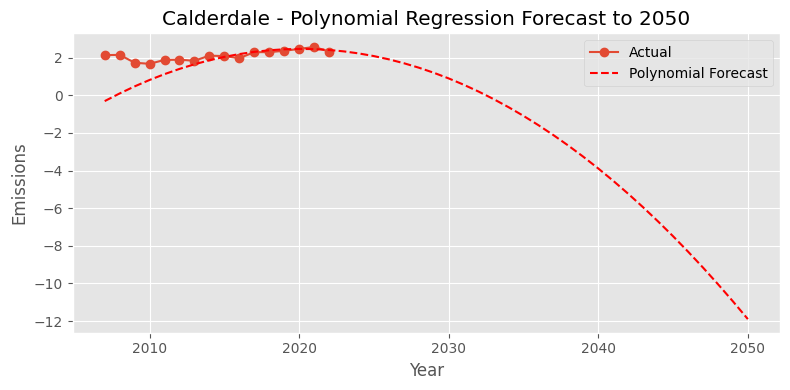

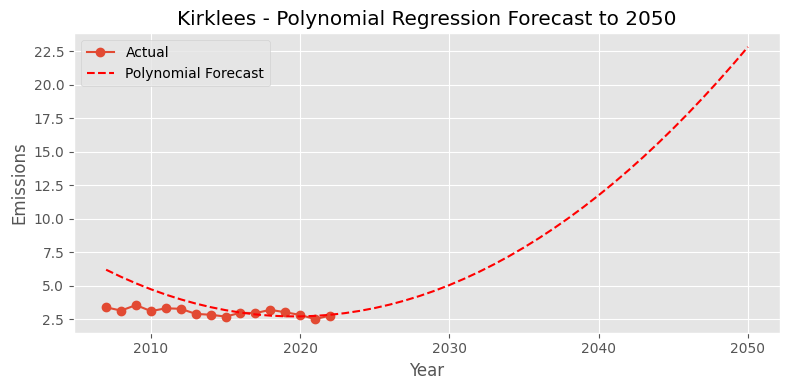

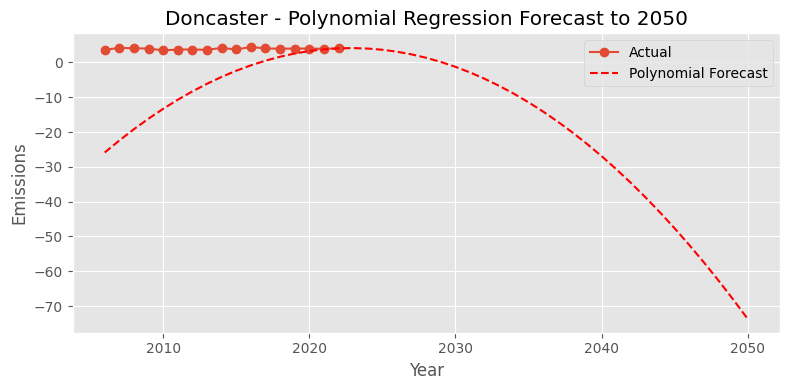

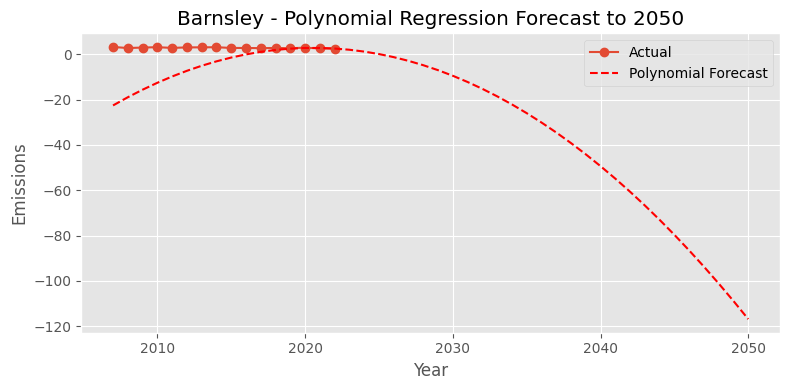

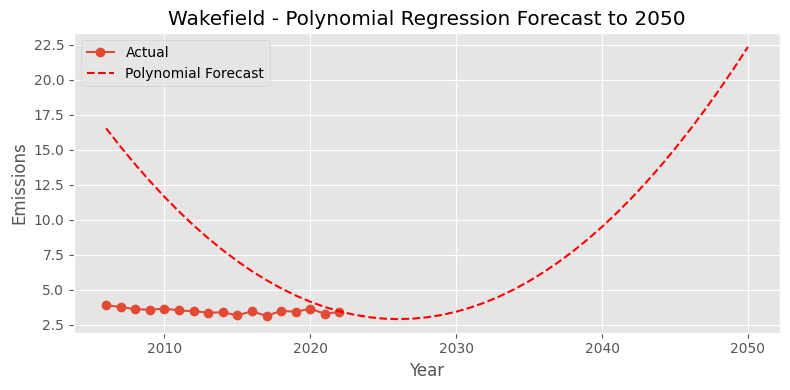

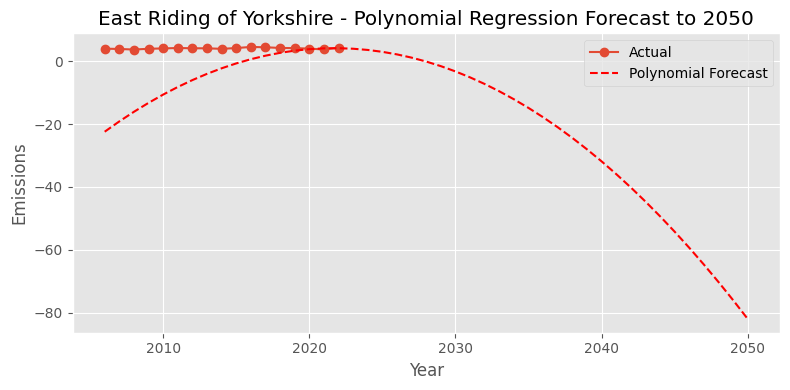

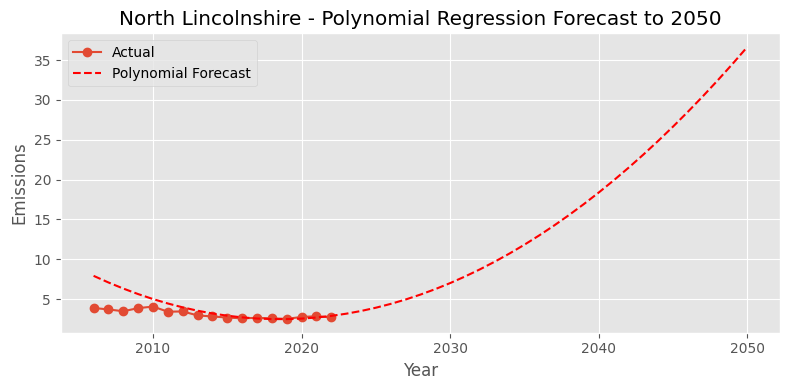

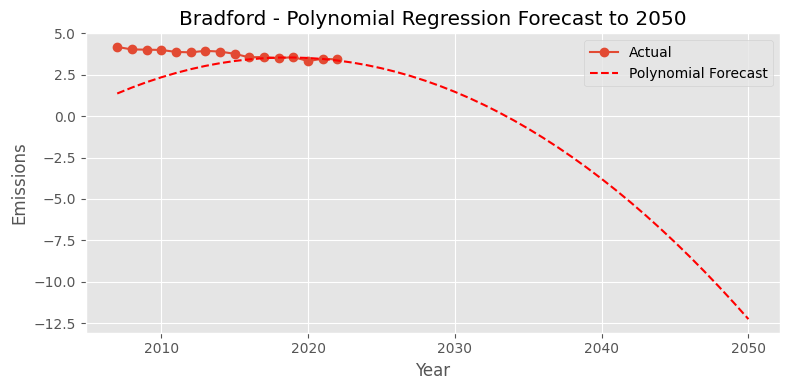

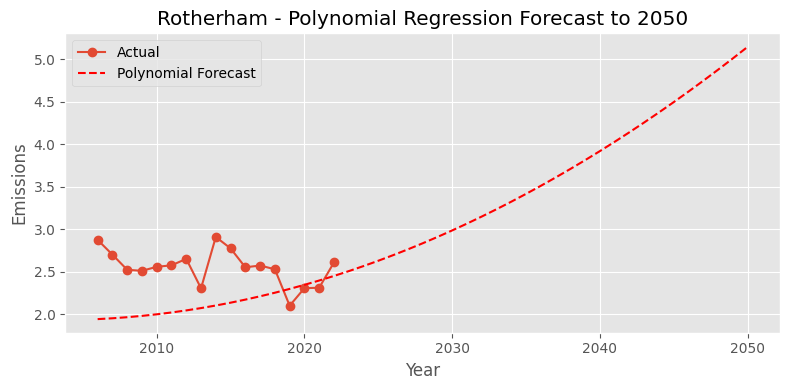

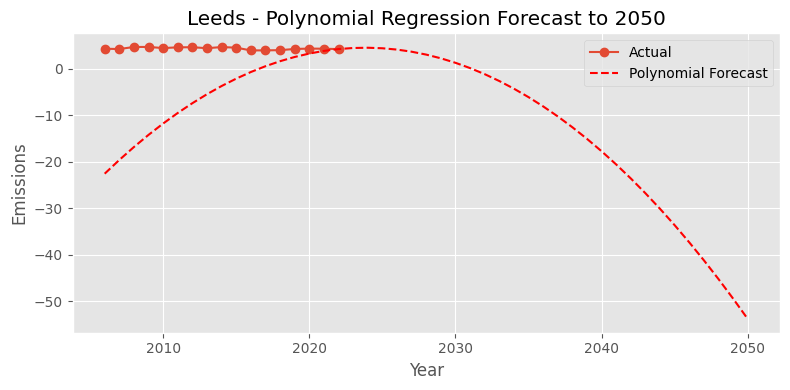

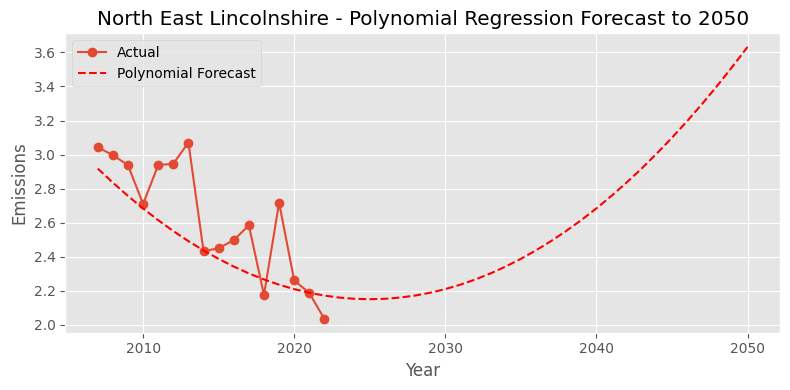

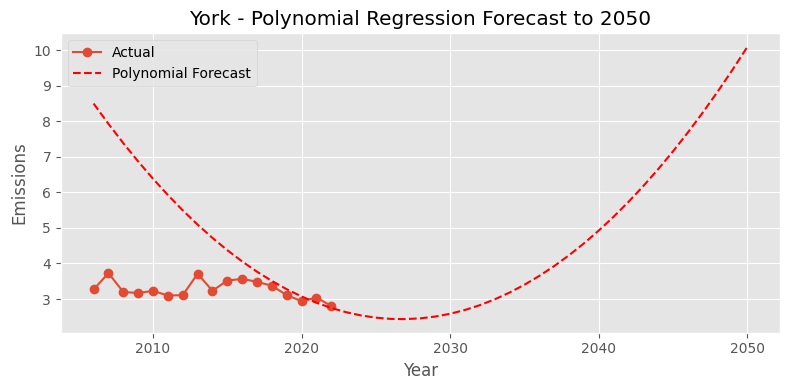

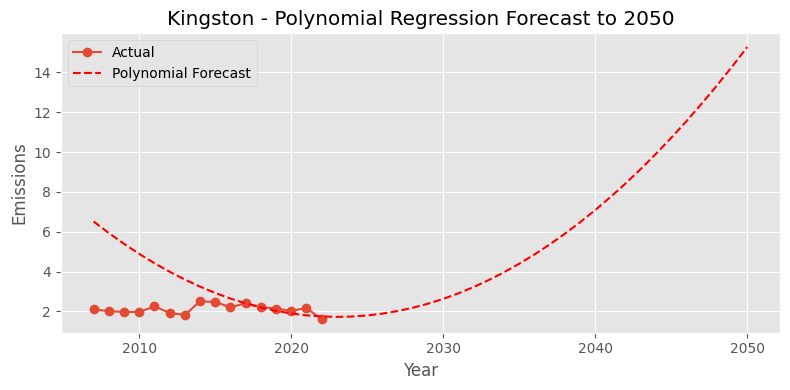

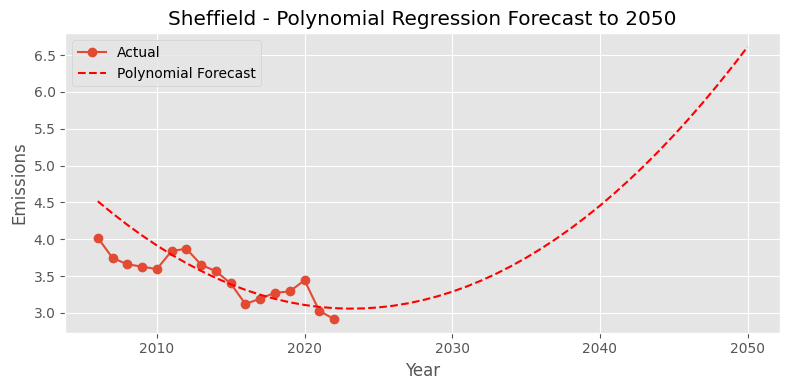

In [ ]:
# Polynomial plot for each city
for city in cities:
    var_name = city.lower().replace(" ", "_").replace(",", "").replace("__", "_") + "_yearly_df"
    df = globals()[var_name].copy()

    if df.index.name == "Year":
        df["Year"] = df.index.year

    # Drop missing data
    df = df.dropna(subset=["Emissions", "Population"])

    # Features and target
    X = df[["Year", "Population"]].values
    y = df["Emissions"].values

    # Polynomial transformation (degree 2)
    poly = PolynomialFeatures(degree=2, include_bias=False)
    X_poly = poly.fit_transform(X)

    # Fit polynomial regression model
    model = LinearRegression()
    model.fit(X_poly, y)

    # Forecast future years (up to 2050) using latest population value
    future_years = np.arange(df["Year"].min(), 2051)
    pop_2050 = df["Population"].iloc[-1]  # use latest population value
    future_data = np.array([[year, pop_2050] for year in future_years])
    future_data_poly = poly.transform(future_data)
    y_forecast = model.predict(future_data_poly)

    # Plot
    plt.figure(figsize=(8, 4))
    plt.plot(df["Year"], y, label="Actual", marker='o')
    plt.plot(future_years, y_forecast, label="Polynomial Forecast", linestyle="--", color="red")
    plt.title(f"{city} - Polynomial Regression Forecast to 2050")
    plt.xlabel("Year")
    plt.ylabel("Emissions")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [ ]:
# Save polynomial regression results into csv file
poly_eval_df.to_csv("polynomial_regression_results.csv", index=False)

## XGBoost regression

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

xgb_eval_results = []

for city in cities:
    var_name = city.lower().replace(" ", "_").replace(",", "").replace("__", "_") + "_yearly_df"
    try:
        df = globals()[var_name].copy()
    except KeyError:
        print(f"Warning: DataFrame '{var_name}' not found. Skipping {city}.")
        continue

    # Ensure 'Year' is numeric (as in your original code)
    if df.index.name == "Year":
        df["Year"] = df.index.year
    elif "Year" in df.columns and not np.issubdtype(df["Year"].dtype, np.number):
        try:
            df["Year"] = pd.to_datetime(df["Year"]).dt.year
        except Exception as e:
            print(f"Error converting 'Year' to numeric for {city}: {e}")
            continue

    df = df.dropna(subset=["Emissions", "Population", "Year"]) # Include 'Year' for splitting

    # Features and target
    X = df[["Year", "Population"]].values
    y = df["Emissions"].values

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit XGBoost regressor on the training data
    model = XGBRegressor(objective='reg:squarederror', random_state=42)
    model.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test)

    # Metrics on the testing data
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100 if np.all(y_test != 0) else np.nan

    # Forecast 2050 using the model trained on all data (or just training data if you prefer)
    pop_2050 = df["Population"].iloc[-1]
    pred_2050 = model.predict(np.array([[2050, pop_2050]]))[0]

    xgb_eval_results.append({
        "City": city,
        "R²": r2,
        "RMSE": rmse,
        "MAE": mae,
        "MAPE (%)": mape,
        "2050 Prediction": pred_2050
    })

# Create DataFrame of evaluation results
xgb_eval_df = pd.DataFrame(xgb_eval_results).sort_values(by="MAPE (%)")
print(xgb_eval_df.round(2))

                        City    R²  RMSE   MAE  MAPE (%)  2050 Prediction
7                   Bradford  0.89  0.09  0.06      1.59             3.43
10   North East Lincolnshire  0.96  0.07  0.06      2.29             2.04
8                  Rotherham  0.07  0.20  0.14      4.93             2.61
5   East Riding of Yorkshire -0.75  0.22  0.21      5.46             4.32
9                      Leeds -3.60  0.30  0.25      5.75             4.27
12                  Kingston -0.81  0.12  0.12      5.99             1.61
11                      York -0.08  0.28  0.21      5.99             2.81
2                  Doncaster -0.43  0.27  0.23      6.29             4.02
4                  Wakefield -0.17  0.25  0.23      6.60             3.40
1                   Kirklees  0.43  0.26  0.22      7.30             2.78
13                 Sheffield  0.35  0.30  0.28      7.84             2.92
3                   Barnsley -0.09  0.27  0.26      9.37             2.53
6         North Lincolnshire -0.05  0.

In [ ]:
# Save XGBoost regression results into csv file
xgb_eval_df.to_csv("XGBoost_results_2.csv", index=False)

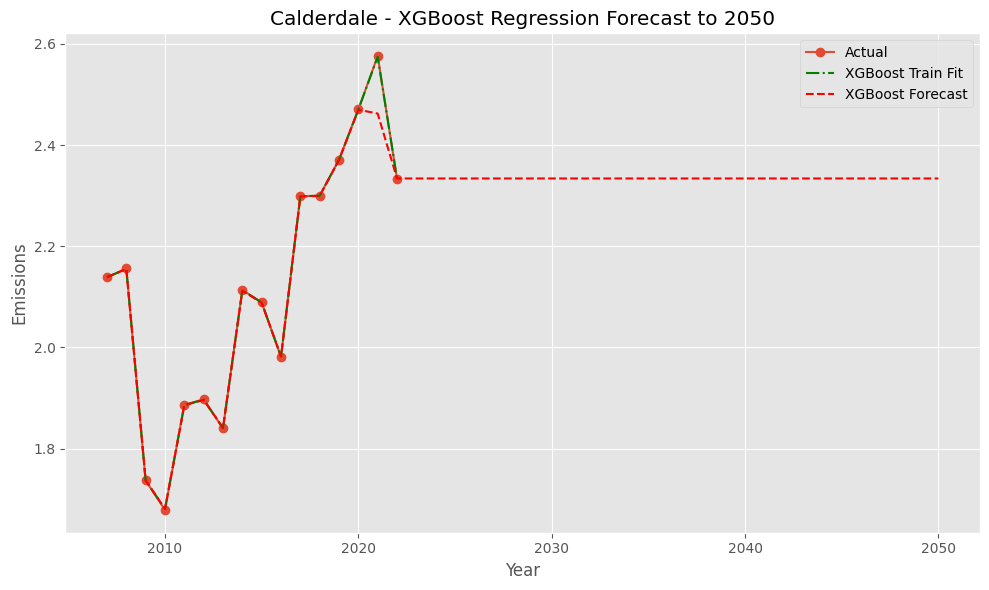

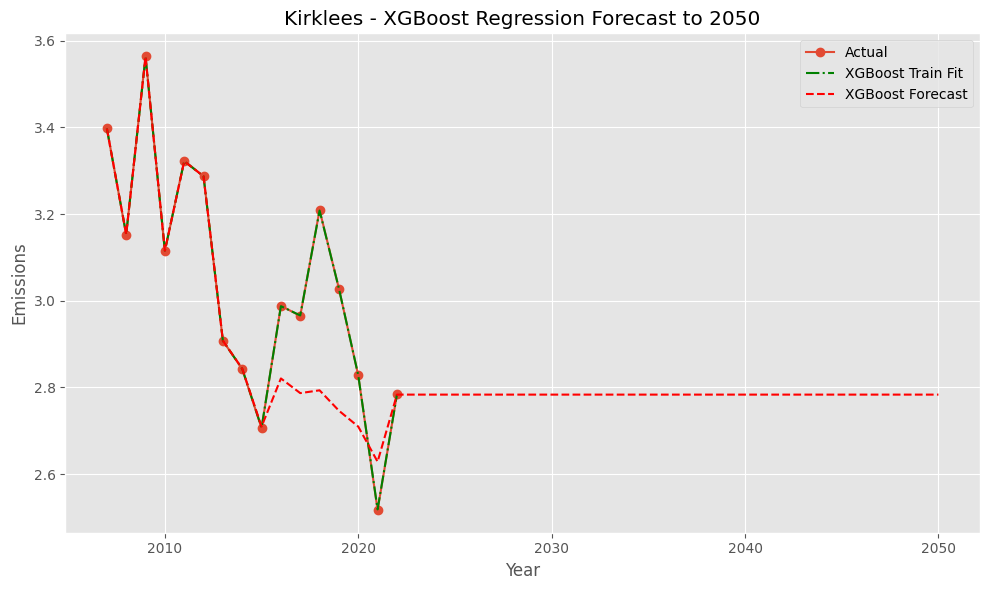

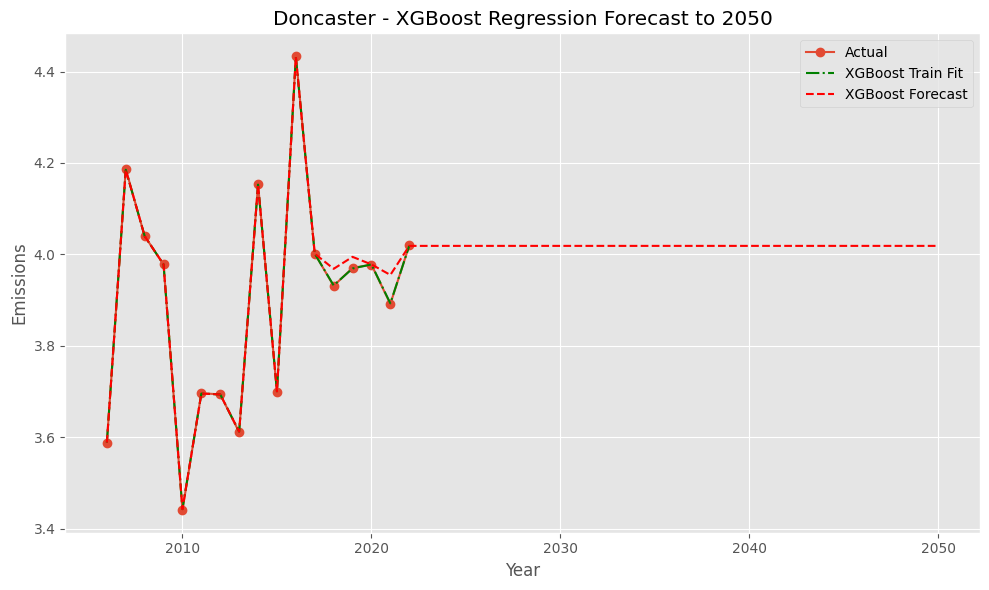

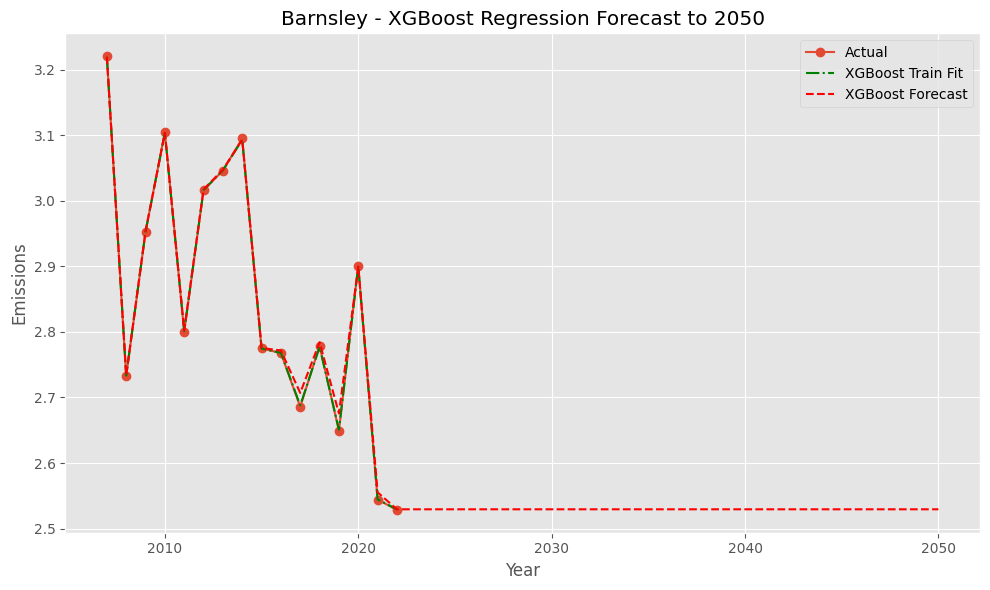

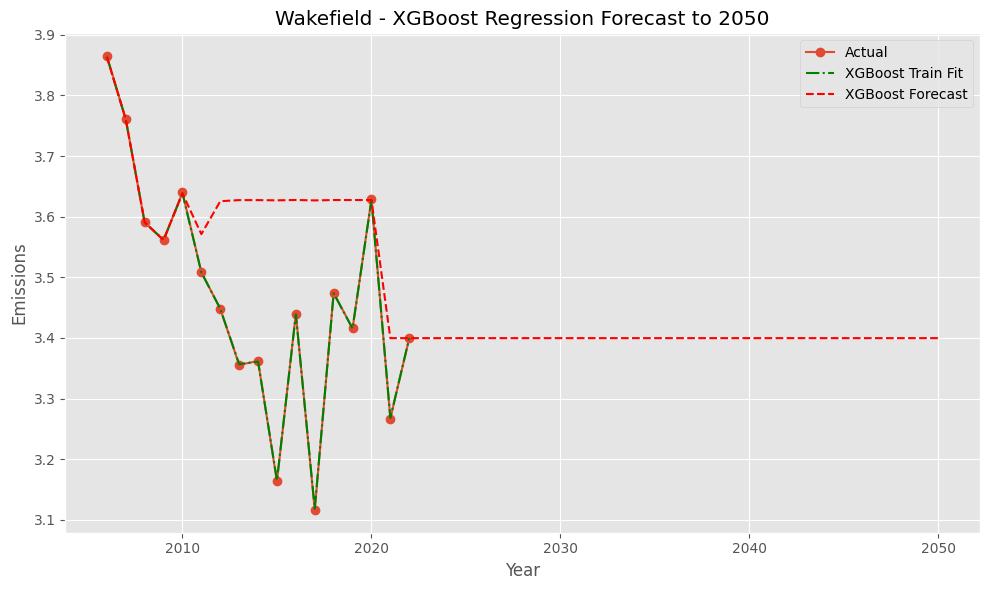

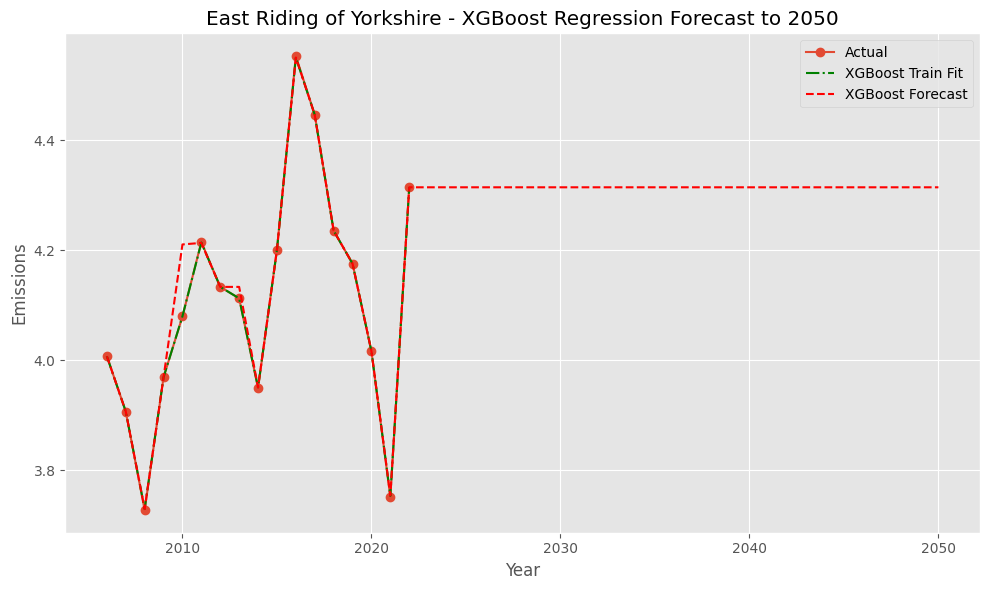

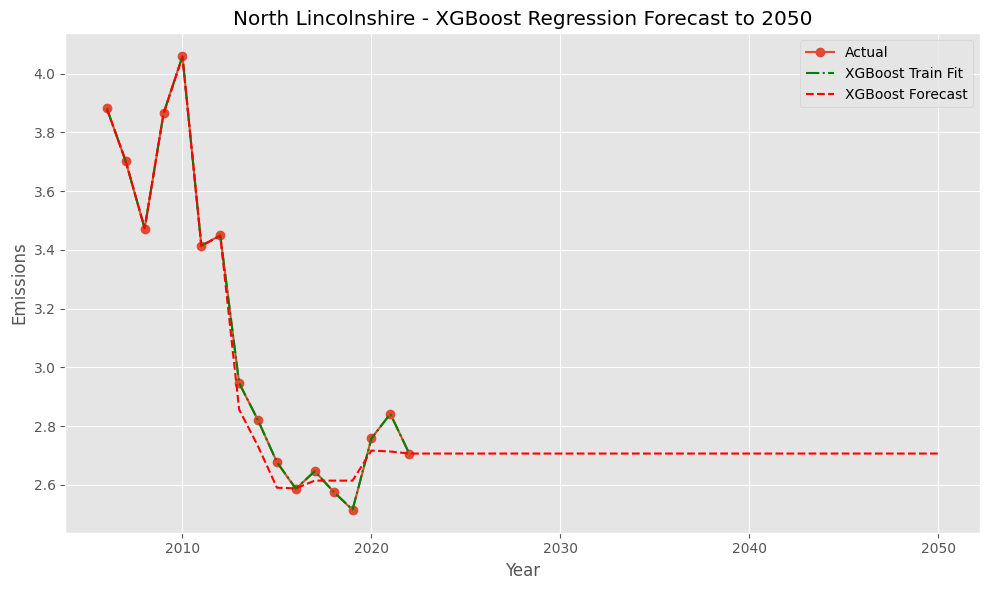

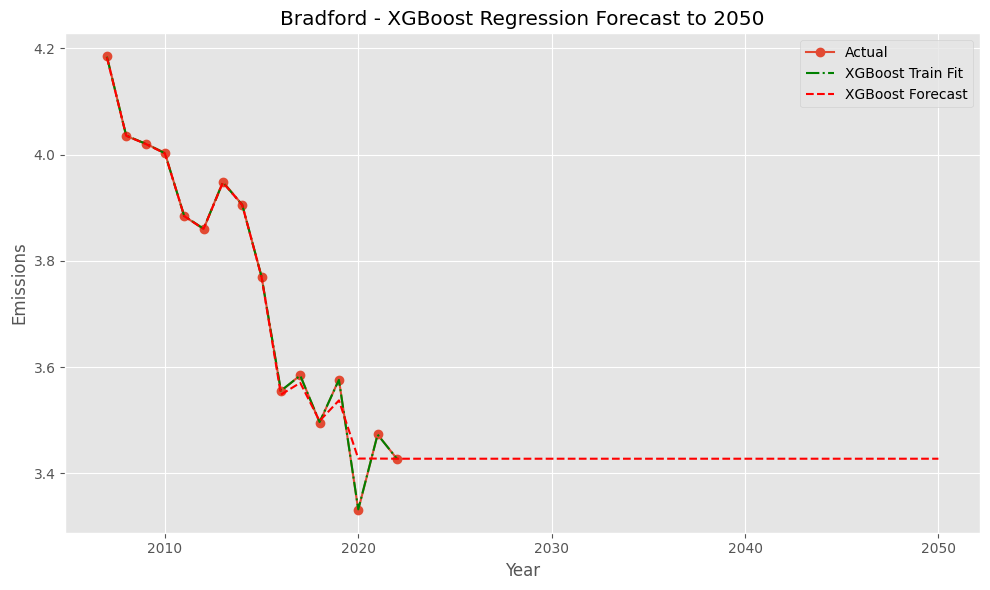

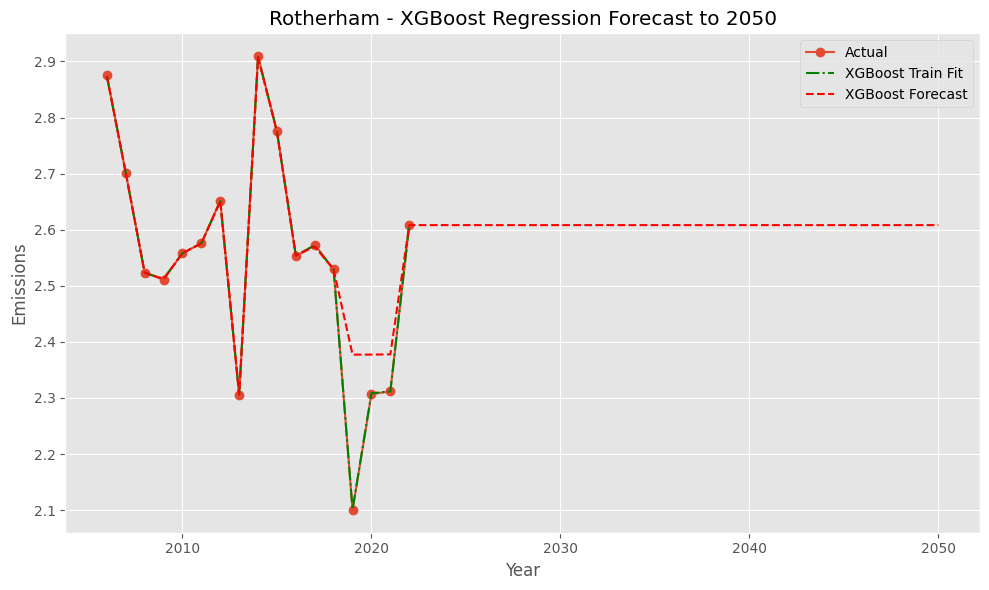

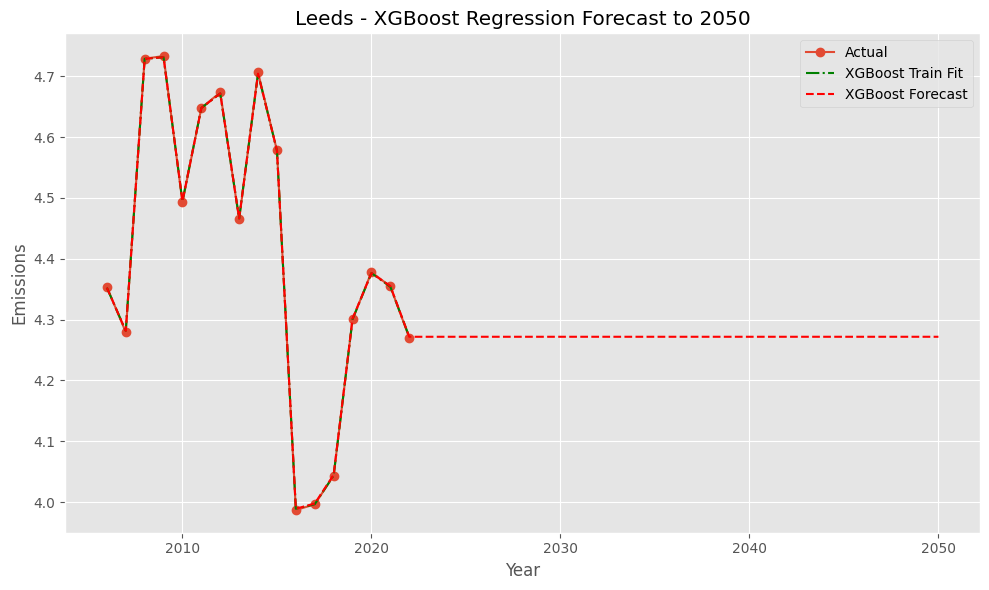

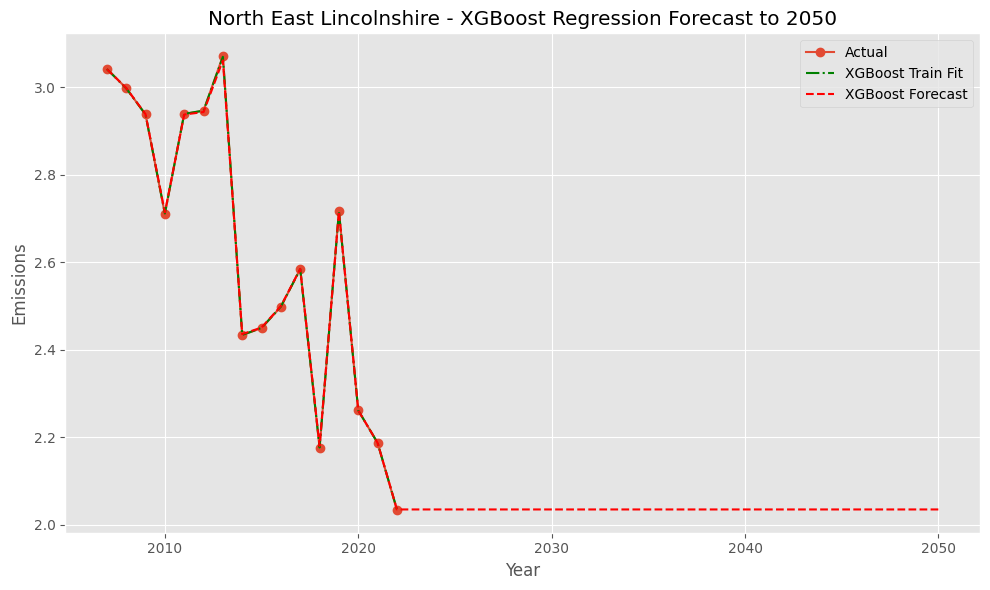

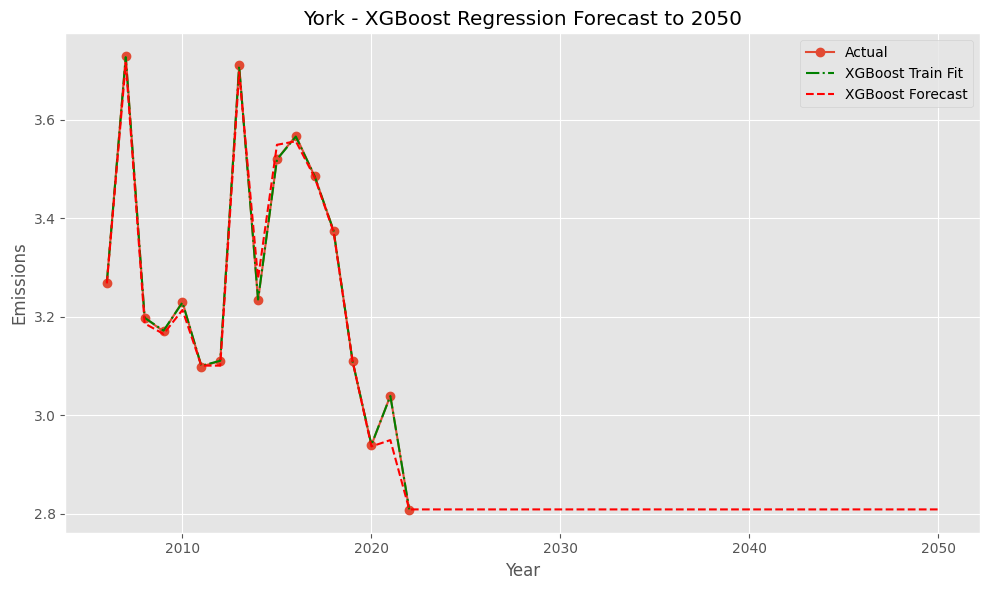

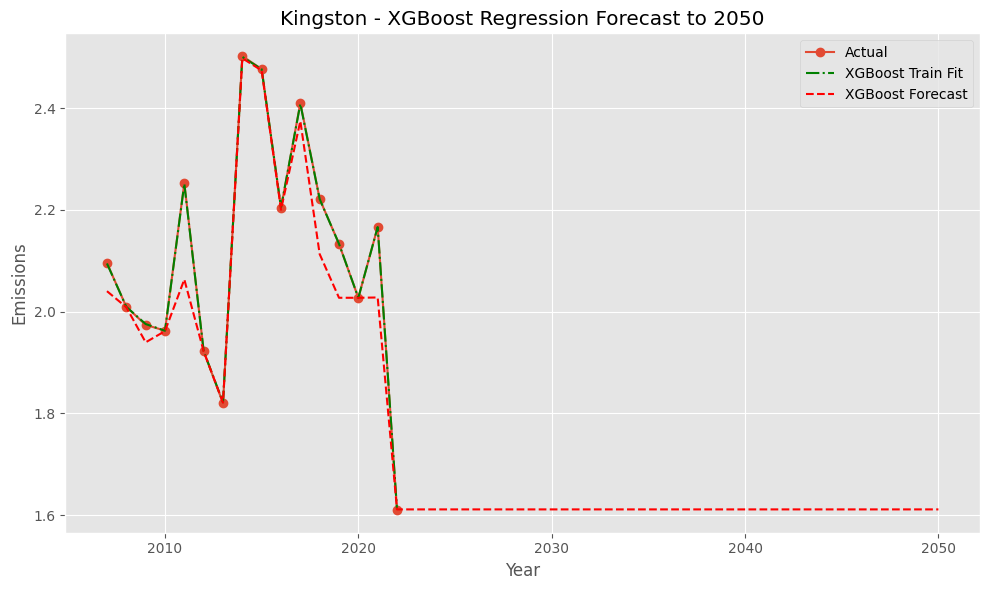

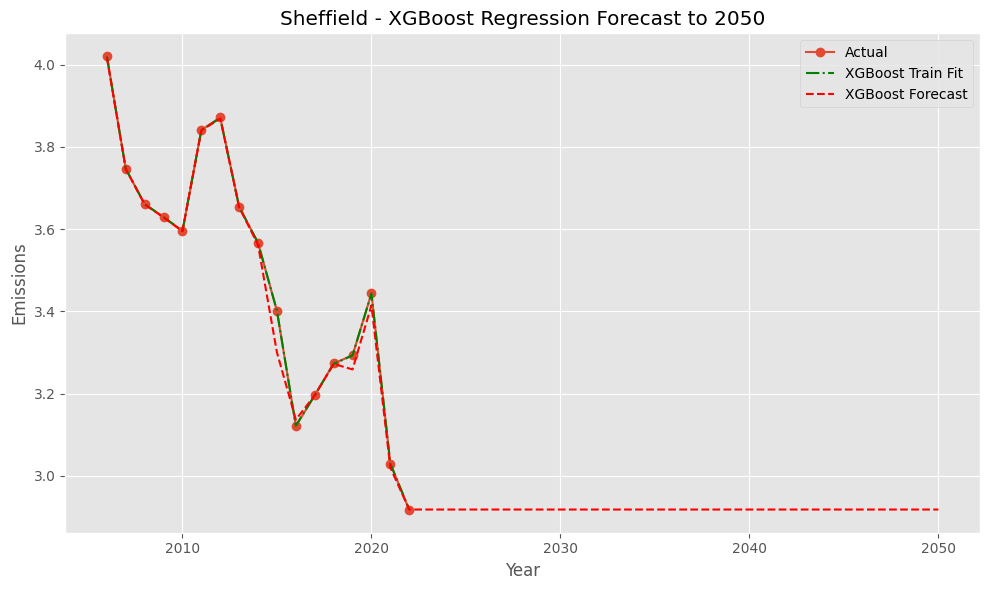

In [ ]:
# XGBoost plot for each city
for city in cities:
    var_name = city.lower().replace(" ", "_").replace(",", "").replace("__", "_") + "_yearly_df"
    df = globals()[var_name].copy()

    if df.index.name == "Year":
        df["Year"] = df.index.year


    df = df.dropna(subset=["Emissions", "Population", "Year"])

    # Features and target
    X = df[["Year", "Population"]].values
    y = df["Emissions"].values

    # Fit XGBoost regressor
    model = XGBRegressor(objective='reg:squarederror', random_state=42)
    model.fit(X, y)
    y_pred_train = model.predict(X)  # Predictions on the training data

    # Forecast future years (up to 2050) using latest population value
    future_years = np.arange(df["Year"].min(), 2051)
    pop_2050 = df["Population"].iloc[-1]  # use latest population value
    future_data = np.array([[year, pop_2050] for year in future_years])
    y_forecast = model.predict(future_data)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(df["Year"], y, label="Actual", marker='o')
    plt.plot(df["Year"], y_pred_train, label="XGBoost Train Fit", linestyle="-.", color="green")
    plt.plot(future_years, y_forecast, label="XGBoost Forecast", linestyle="--", color="red")
    plt.title(f"{city} - XGBoost Regression Forecast to 2050")
    plt.xlabel("Year")
    plt.ylabel("Emissions")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

## PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [ ]:
print(df_yorkshire)

                          Region  Calendar Year Local Authority LA GHG Sector  \
13482   Yorkshire and the Humber           2005        Kingston   Agriculture   
13483   Yorkshire and the Humber           2005        Kingston   Agriculture   
13484   Yorkshire and the Humber           2005        Kingston   Agriculture   
13485   Yorkshire and the Humber           2005        Kingston   Agriculture   
13486   Yorkshire and the Humber           2005        Kingston   Agriculture   
...                          ...            ...             ...           ...   
388716  Yorkshire and the Humber           2022       Wakefield     Transport   
388717  Yorkshire and the Humber           2022       Wakefield         Waste   
388718  Yorkshire and the Humber           2022       Wakefield         Waste   
388719  Yorkshire and the Humber           2022       Wakefield         Waste   
388720  Yorkshire and the Humber           2022       Wakefield         Waste   

              LA GHG Sub-se

In [ ]:
df_yorkshire.columns

Index(['Region', 'Calendar Year', 'Local Authority', 'LA GHG Sector',
       'LA GHG Sub-sector', 'Greenhouse gas',
       'Territorial emissions (kt CO2e)',
       'CO2 emissions within the scope of influence of LAs (kt CO2)',
       'Mid-year Population (thousands)'],
      dtype='object')

In [ ]:
# 1. Aggregate or pivot your data (optional, for yearly emissions & population per region)
agg_df = df_yorkshire.groupby(['Local Authority', 'Calendar Year']).agg({
    'Territorial emissions (kt CO2e)': 'sum',
    'Mid-year Population (thousands)': 'sum'
    }).reset_index()

# 2. Average over years to get a single point per Local Authority
summary_df = agg_df.groupby('Local Authority').agg({
    'Territorial emissions (kt CO2e)': 'mean',
    'Mid-year Population (thousands)': 'mean'
    }).reset_index()

# 3. Scale the data
features = ['Territorial emissions (kt CO2e)', 'Mid-year Population (thousands)']
X = summary_df[features].values
X_scaled = StandardScaler().fit_transform(X)

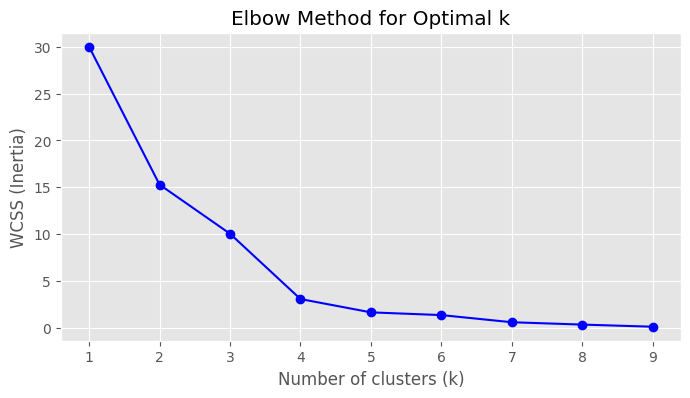

In [ ]:
# 4. Elbow Method to find optimal k
wcss = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(K_range, wcss, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [ ]:
# 5. Choose optimal_k based on the elbow plot
optimal_k = 4

# 6. Apply KMeans clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
summary_df['Cluster'] = kmeans.fit_predict(X_scaled)

In [ ]:
# 7. PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
summary_df['PC1'] = X_pca[:, 0]
summary_df['PC2'] = X_pca[:, 1]

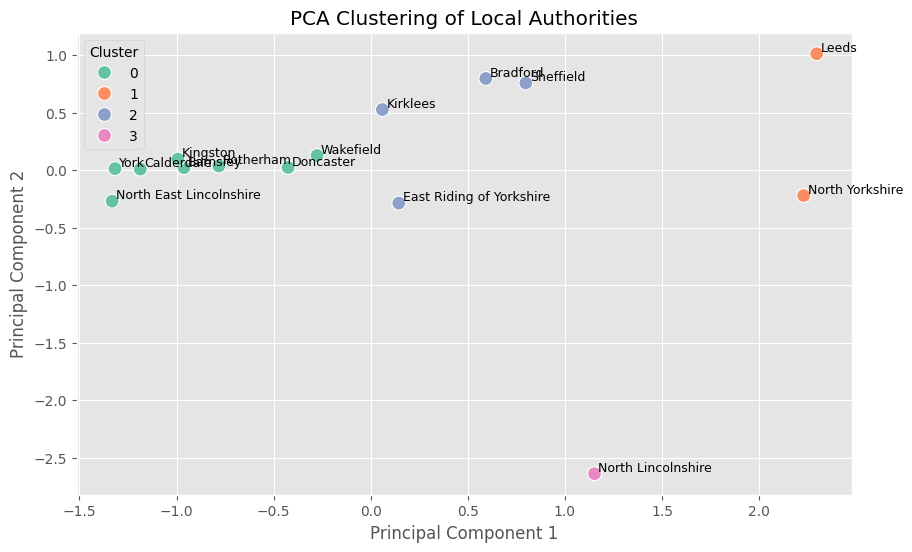

In [ ]:
# 8. Plot PCA scatter with clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=summary_df, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=100)
for _, row in summary_df.iterrows():
    plt.text(row['PC1'] + 0.02, row['PC2'] + 0.02, row['Local Authority'], fontsize=9)
plt.title('PCA Clustering of Local Authorities')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()